In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, adjusted_rand_score
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from ipywidgets import FloatProgress
from IPython.display import display
%matplotlib inline

In [2]:
def fit_scatter(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Observed AUC')
    ax.set_ylabel('Predicted AUC')
    ax.set_title('')

In [3]:
def print_stats(true,predictions):
    print('Coefficient of determination R^2: {}'.format(r2_score(true, predictions)))
    print('Mean squared error:               {}'.format(mean_squared_error(true, predictions)))
    print('Mean absolute error:              {}'.format(mean_absolute_error(true, predictions)))
    print('Root mean squared error:          {}'.format(np.sqrt(mean_squared_error(true, predictions))))
    print('Correlation Coefficient:          {}'.format(np.corrcoef(true, predictions)[0][1]))

In [4]:
def get_best_settings(results_1,results_2):
    best_result_1 = results_1[0][0][0]
    best_result_2 = results_2[0][0][0]
    best_difference = results_2[0][0][0] - results_1[0][0][0]

    best_i_1=0
    best_j_1=0
    best_k_1=0

    best_i_2=0
    best_j_2=0
    best_k_2=0

    best_i_3=0
    best_j_3=0
    best_k_3=0
    

    mxf = [5,7,10,12,15,18,20,25,30,50,80,10]
    md = [5,7,10,12,15,18,20]
    n_est = [10,20,30,40,50,60,80,90,100,120,140,160]
    
    for i in range(len(mxf)):
        for j in range(len(md)):
            for k in range(len(n_est)):
                if best_result_1 < results_1[i][j][k]:
                    best_result_1 = results_1[i][j][k]
                    best_i_1=i
                    best_j_1=j
                    best_k_1=k
                if best_result_2 < results_2[i][j][k]:
                    best_result_2 = results_2[i][j][k]
                    best_i_2=i
                    best_j_2=j
                    best_k_2=k
                if best_difference < results_2[i][j][k] - results_1[i][j][k]:
                    best_difference = results_2[i][j][k] - results_1[i][j][k]
                    best_i_3=i
                    best_j_3=j
                    best_k_3=k

#     print('{} {} {} : {}'.format(best_i_1,best_j_1,best_k_1,best_result_1))
#     print('{} {} {} : {}'.format(best_i_2,best_j_2,best_k_2,best_result_2))
#     print('{} {} {} : {}'.format(best_i_3,best_j_3,best_k_3,best_difference))

    print('Normal best: {} | max_features: {}; max_depth: {}; n_estimators: {};'.format(best_result_1,mxf[best_i_1],md[best_j_1],n_est[best_k_1]))
    print('Extended best: {} | max_features: {}; max_depth: {}; n_estimators: {};'.format(best_result_2,mxf[best_i_2],md[best_j_2],n_est[best_k_2]))
    print('Best difference: {} | max_features: {}; max_depth: {}; n_estimators: {};'.format(best_difference,mxf[best_i_3],md[best_j_3],n_est[best_k_3]))
    
    return mxf[best_i_1],md[best_j_1],n_est[best_k_1],mxf[best_i_2],md[best_j_2],n_est[best_k_2]

In [5]:
data_path = os.path.join(os.getcwd(), 'datasets', 'features.csv')
data_path_rp = os.path.join(os.getcwd(), 'datasets', 'rp_features.csv')
data_path_nrp = os.path.join(os.getcwd(), 'datasets', 'nrp_features.csv')

data_path_extended = os.path.join(os.getcwd(), 'datasets', 'extended_features.csv')
data_path_rp_extended = os.path.join(os.getcwd(), 'datasets', 'rp_extended_features.csv')
data_path_nrp_extended = os.path.join(os.getcwd(), 'datasets', 'nrp_extended_features.csv')

data_path_cut = os.path.join(os.getcwd(), 'datasets', 'features_cut.csv')
data_path_extended_cut = os.path.join(os.getcwd(), 'datasets', 'extended_features_cut.csv')

data_path_rp_cut = os.path.join(os.getcwd(), 'datasets', 'rp_features_cut.csv')
data_path_nrp_cut = os.path.join(os.getcwd(), 'datasets', 'nrp_features_cut.csv')
data_path_rp_extended_cut = os.path.join(os.getcwd(), 'datasets', 'rp_extended_features_cut.csv')
data_path_nrp_extended_cut = os.path.join(os.getcwd(), 'datasets', 'nrp_extended_features_cut.csv')

gene_features = pd.read_csv(data_path, delimiter = ',')
rp_gene_features = pd.read_csv(data_path_rp, delimiter = ',')
nrp_gene_features = pd.read_csv(data_path_nrp, delimiter = ',')

extended_features = pd.read_csv(data_path_extended, delimiter = ',')
rp_extended_features = pd.read_csv(data_path_rp_extended, delimiter = ',')
nrp_extended_features = pd.read_csv(data_path_nrp_extended, delimiter = ',')

gene_features_cut = pd.read_csv(data_path_cut, delimiter = ',')
extended_features_cut = pd.read_csv(data_path_extended_cut, delimiter = ',')
rp_features_cut = pd.read_csv(data_path_rp_cut, delimiter = ',')
rp_extended_features_cut = pd.read_csv(data_path_rp_extended_cut, delimiter = ',')
nrp_features_cut = pd.read_csv(data_path_nrp_cut, delimiter = ',')
nrp_extended_features_cut = pd.read_csv(data_path_nrp_extended_cut, delimiter = ',')

print('Number of data points: {}. Number of attributes: {}'.format(gene_features.shape[0],gene_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(extended_features.shape[0],extended_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(rp_gene_features.shape[0],rp_gene_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(rp_extended_features.shape[0],rp_extended_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(nrp_gene_features.shape[0],nrp_gene_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(nrp_extended_features.shape[0],nrp_extended_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(gene_features_cut.shape[0],gene_features_cut.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(extended_features_cut.shape[0],extended_features_cut.shape[1]))

Number of data points: 117. Number of attributes: 101
Number of data points: 117. Number of attributes: 106
Number of data points: 84. Number of attributes: 101
Number of data points: 84. Number of attributes: 106
Number of data points: 33. Number of attributes: 101
Number of data points: 33. Number of attributes: 106
Number of data points: 117. Number of attributes: 21
Number of data points: 117. Number of attributes: 26


In [9]:
def get_data(dataset):
    
    X = gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
    X_cut = gene_features_cut.drop(['ORG', 'Gene','AUC'], axis=1)
    y = gene_features['AUC']

    X_rp = rp_gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
    X_rp_cut = rp_features_cut.drop(['ORG', 'Gene','AUC'], axis=1)
    y_rp = rp_gene_features['AUC']

    X_nrp = nrp_gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
    X_nrp_cut = nrp_features_cut.drop(['ORG', 'Gene','AUC'], axis=1)
    y_nrp = nrp_gene_features['AUC']

    X_extended = extended_features.drop(['ORG', 'Gene','AUC'], axis=1)
    X_extended_cut = extended_features_cut.drop(['ORG', 'Gene','AUC'], axis=1)
    y_extended = extended_features['AUC']

    X_rp_extended = rp_extended_features.drop(['ORG', 'Gene','AUC'], axis=1)
    X_rp_extended_cut = rp_extended_features_cut.drop(['ORG', 'Gene','AUC'], axis=1)
    y_rp_extended = rp_extended_features['AUC']

    X_nrp_extended = nrp_extended_features.drop(['ORG', 'Gene','AUC'], axis=1)
    X_nrp_extended_cut = nrp_extended_features_cut.drop(['ORG', 'Gene','AUC'], axis=1)
    y_nrp_extended = nrp_extended_features['AUC']
    
    if dataset == 'full':
        return X,y,X_extended,y_extended
    elif dataset == 'rp':
        return X_rp,y_rp,X_rp_extended,y_rp_extended
    elif dataset == 'nrp':
        return X_nrp,y_nrp,X_nrp_extended,y_nrp_extended
    elif dataset == 'cut':
        return X_cut,y,X_extended_cut,y_extended
    elif dataset == 'rp_cut':
        return X_rp_cut,y_rp,X_rp_extended_cut,y_rp_extended
    elif dataset == 'nrp_cut':
        return X_nrp_cut,y_nrp,X_nrp_extended_cut,y_nrp_extended
    else:
        return None, None, None, None

In [7]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [10]:
X,y,X2,y2 = get_data('cut')

lr1 = LinearRegression()
lr2 = LinearRegression()

predictions1 = cross_val_predict(lr1,X,y=y,cv=kf)
predictions2 = cross_val_predict(lr1,X2,y=y2,cv=kf)

print('Data')
print_stats(y,predictions1)
print('\n')
print('Extended Data')
print_stats(y2,predictions2)

Data
Coefficient of determination R^2: 0.3453533599006715
Mean squared error:               0.03414292129583201
Mean absolute error:              0.13180031718195592
Root mean squared error:          0.18477803250341207
Correlation Coefficient:          0.6119030859542423


Extended Data
Coefficient of determination R^2: 0.30643349076151094
Mean squared error:               0.03617277671319247
Mean absolute error:              0.13939719344002677
Root mean squared error:          0.19019142123974064
Correlation Coefficient:          0.596836189104217


Data
Coefficient of determination R^2: 0.31742377492357454
Mean squared error:               0.03559958136752136
Mean absolute error:              0.13785470085470086
Root mean squared error:          0.18867851326402102
Correlation Coefficient:          0.5751371505700912


Extended Data
Coefficient of determination R^2: 0.3966759559480054
Mean squared error:               0.03146620495726496
Mean absolute error:              0.12602222222222223
Root mean squared error:          0.17738716119625164
Correlation Coefficient:          0.6309971941038075


Text(0.5,1,'Random forrest regression extended features importance')

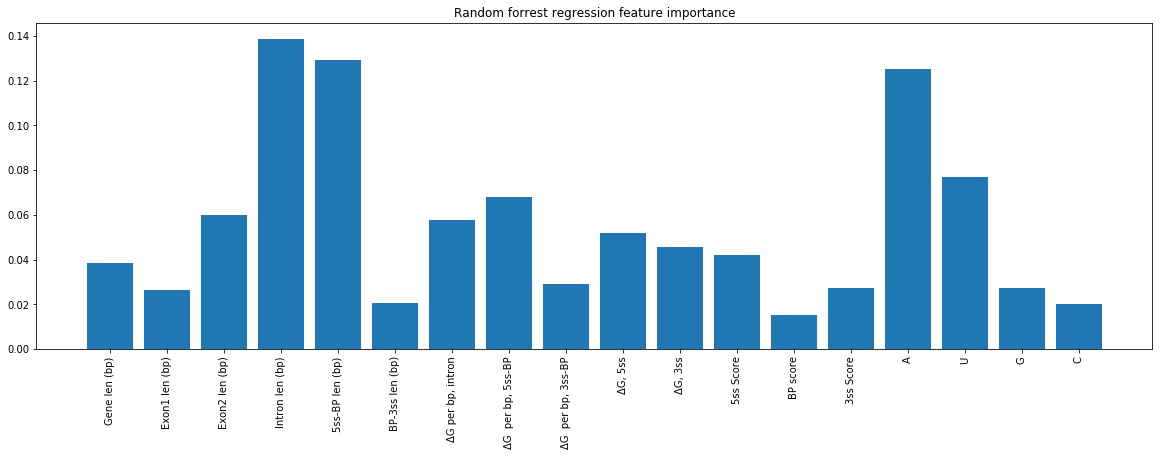

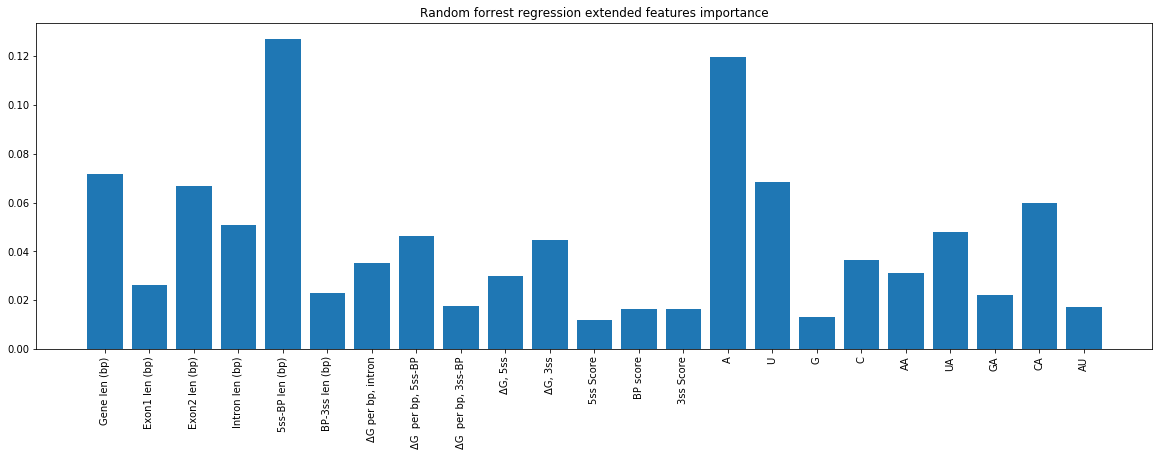

In [11]:
X,y,X2,y2 = get_data('cut')

rfr1 = ExtraTreesRegressor(random_state=1337)
rfr2 = ExtraTreesRegressor(random_state=1337)

predictions_rfr1 = cross_val_predict(rfr1,X,y=y,cv=kf)
predictions_rfr2 = cross_val_predict(rfr2,X2,y=y2,cv=kf)

print('Data')
print_stats(y,predictions_rfr1)
print('\n')
print('Extended Data')
print_stats(y2,predictions_rfr2)

rfr1.fit(X,y)
fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr1.feature_importances_))
ax1.bar(xx, rfr1.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Random forrest regression feature importance')

rfr2.fit(X2,y2)
fig2, ax2 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr2.feature_importances_))
ax2.bar(xx, rfr2.feature_importances_)
ax2.set_xticks(xx)
ax2.set_xticklabels(extended_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax2.set_title('Random forrest regression extended features importance')

# Full Set

In [19]:
def best_RFs(results1,results2,dataset):
     
    X,y,X2,y2 = get_data(dataset)
    mxf1, md1, n_est1, mxf2, md2, n_est2 = get_best_settings(results1,results2)
    
    kf = KFold(n_splits=5,shuffle=True,random_state=0)
    
    rfr1 = ExtraTreesRegressor(n_estimators=n_est1, 
                                criterion='mse', 
                                max_features=mxf1, 
                                max_depth=md1, 
                                n_jobs=2,
                                random_state=1337)

    rfr2 = ExtraTreesRegressor(n_estimators=n_est2, 
                                criterion='mse', 
                                max_features=mxf2, 
                                max_depth=md2, 
                                n_jobs=2,
                                random_state=1337)

    predictions_rfr1 = cross_val_predict(rfr1,X,y=y,cv=kf)
    predictions_rfr2 = cross_val_predict(rfr2,X2,y=y2,cv=kf)

    print('Normal feature space')
    print_stats(y, predictions_rfr1)
    print('\n')
    print('Extended feature space')
    print_stats(y2, predictions_rfr2)
    print('-------------------------------------------------------\n')
         
    settings = 'max_features: {}; max_depth: {}; n_estimators: {};'.format(mxf1,md1,n_est1)
          
    rfr1.fit(X,y)
    fig, ax1 = plt.subplots(figsize=(20,6))
    xx = np.arange(len(rfr1.feature_importances_))
    ax1.bar(xx, rfr1.feature_importances_)
    ax1.set_xticks(xx)
    ax1.set_xticklabels(gene_features_cut.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
    ax1.set_title('Normal RF: {} -- {}'.format(settings,np.corrcoef(y, predictions_rfr1)[0][1]))

    settings = 'max_features: {}; max_depth: {}; n_estimators: {};'.format(mxf2,md2,n_est2)
    rfr2.fit(X2,y2)
    fig2, ax2 = plt.subplots(figsize=(20,6))
    xx = np.arange(len(rfr2.feature_importances_))
    ax2.bar(xx, rfr2.feature_importances_)
    ax2.set_xticks(xx)
    ax2.set_xticklabels(extended_features_cut.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
    ax2.set_title('Extended RF : {} -- {}'.format(settings,np.corrcoef(y2, predictions_rfr2)[0][1]))

In [13]:
X,y,X2,y2 = get_data('cut')
print('echo')
mxf = [5,7,10,12,15,18,20,25,30,50,80,10]
md = [5,7,10,12,15,18,20]
n_est = [10,20,30,40,50,60,80,90,100,120,140,160]

results_1_full = np.zeros((len(mxf),len(md),len(n_est)))
results_2_full = np.zeros((len(mxf),len(md),len(n_est)))

f = FloatProgress(min=0, max=(len(mxf)*len(md)*len(n_est)))
display(f)


i = 0
for max_features in mxf:
    j = 0
    for max_depth in md:
        k = 0
        for n_estimators in n_est:            
            
            kf = KFold(n_splits=5,shuffle=True,random_state=0)

            rfr1 = ExtraTreesRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            rfr2 = ExtraTreesRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
            predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
            
            print('max_features: {}; max_depth: {}; n_estimators: {};\n'.format(max_features,max_depth,n_estimators))

            print('Normal feature space')
            print_stats(y, predictions_rfr1)
            print('\n')
            print('Extended feature space')
            print_stats(y2, predictions_rfr2)
            print('-------------------------------------------------------\n')
            

            results_1_full[i][j][k]=np.corrcoef(y, predictions_rfr1)[0][1]
            results_2_full[i][j][k]=np.corrcoef(y2, predictions_rfr2)[0][1]
            
            f.value += 1
            
            k += 1
        j += 1
    i += 1

echo


FloatProgress(value=0.0, max=1008.0)

max_features: 5; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3852018216398875
Mean squared error:               0.03206463537853839
Mean absolute error:              0.135085277822617
Root mean squared error:          0.1790660084397326
Correlation Coefficient:          0.6262334345069076


Extended feature space
Coefficient of determination R^2: 0.3957114993898654
Mean squared error:               0.0315165059323877
Mean absolute error:              0.13479552013835594
Root mean squared error:          0.1775288875997022
Correlation Coefficient:          0.6403725635378433
-------------------------------------------------------

max_features: 5; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4053565154042842
Mean squared error:               0.031013472688946057
Mean absolute error:              0.13336332459706582
Root mean squared error:          0.17610642432616153
Correlation Coefficient:     

max_features: 5; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4132653415707115
Mean squared error:               0.030600989964981
Mean absolute error:              0.13037502321488625
Root mean squared error:          0.17493138644903322
Correlation Coefficient:          0.6429477715036637


Extended feature space
Coefficient of determination R^2: 0.4364073758087149
Mean squared error:               0.02939402332799694
Mean absolute error:              0.13299621036113277
Root mean squared error:          0.17144685277950406
Correlation Coefficient:          0.6634743722900075
-------------------------------------------------------

max_features: 5; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.42751154203391195
Mean squared error:               0.029857983171108358
Mean absolute error:              0.12967841906443722
Root mean squared error:          0.17279462714768754
Correlation Coefficient: 

max_features: 5; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.34829006409521557
Mean squared error:               0.03398975827009917
Mean absolute error:              0.13673398453956523
Root mean squared error:          0.18436311526468402
Correlation Coefficient:          0.59337902856993


Extended feature space
Coefficient of determination R^2: 0.40244516158314614
Mean squared error:               0.031165313572700314
Mean absolute error:              0.13144781860971289
Root mean squared error:          0.1765370034092012
Correlation Coefficient:          0.6377787901388581
-------------------------------------------------------

max_features: 5; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.40776010149190756
Mean squared error:               0.030888114296203018
Mean absolute error:              0.1311945544818848
Root mean squared error:          0.17575014735755706
Correlation Coefficien

max_features: 5; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.32623085891688963
Mean squared error:               0.03514025024564481
Mean absolute error:              0.13830399979531388
Root mean squared error:          0.18745732913291177
Correlation Coefficient:          0.5752761512959967


Extended feature space
Coefficient of determination R^2: 0.38239354620232535
Mean squared error:               0.032211100236629084
Mean absolute error:              0.13560115635188785
Root mean squared error:          0.17947451138428844
Correlation Coefficient:          0.6194423496211904
-------------------------------------------------------

max_features: 5; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3989439318340007
Mean squared error:               0.03134791927849842
Mean absolute error:              0.13125542487545688
Root mean squared error:          0.1770534362233572
Correlation Coefficie

max_features: 5; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3245727525408746
Mean squared error:               0.03522672834242051
Mean absolute error:              0.13765449494949492
Root mean squared error:          0.18768784814798348
Correlation Coefficient:          0.5791785618542196


Extended feature space
Coefficient of determination R^2: 0.36302944984492624
Mean squared error:               0.033221029528858054
Mean absolute error:              0.1371825274725275
Root mean squared error:          0.18226636971437724
Correlation Coefficient:          0.6025453987589307
-------------------------------------------------------

max_features: 5; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.38408064394730623
Mean squared error:               0.03212311010272033
Mean absolute error:              0.133074932012432
Root mean squared error:          0.17922921107542802
Correlation Coefficient

max_features: 5; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31631144766769237
Mean squared error:               0.03565759449953259
Mean absolute error:              0.13590261752136754
Root mean squared error:          0.1888321860794197
Correlation Coefficient:          0.5718624086035456


Extended feature space
Coefficient of determination R^2: 0.3855327057635013
Mean squared error:               0.03204737820512821
Mean absolute error:              0.13357635327635325
Root mean squared error:          0.179017815328889
Correlation Coefficient:          0.6210232612575379
-------------------------------------------------------

max_features: 5; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3973469396333754
Mean squared error:               0.03143120998172075
Mean absolute error:              0.12989318910256412
Root mean squared error:          0.17728849365291802
Correlation Coefficient: 

max_features: 5; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3083954255066843
Mean squared error:               0.03607045252867997
Mean absolute error:              0.13719410256410255
Root mean squared error:          0.18992222757929092
Correlation Coefficient:          0.5656832675315067


Extended feature space
Coefficient of determination R^2: 0.3809625098728735
Mean squared error:               0.03228573555555555
Mean absolute error:              0.13385641025641024
Root mean squared error:          0.17968231842770604
Correlation Coefficient:          0.6172751274200445
-------------------------------------------------------

max_features: 5; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3912363194650639
Mean squared error:               0.03174990775040361
Mean absolute error:              0.13122360398860397
Root mean squared error:          0.1781850379532569
Correlation Coefficient:

max_features: 7; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.35752983132493843
Mean squared error:               0.03350786066917606
Mean absolute error:              0.13751073593542823
Root mean squared error:          0.1830515246294771
Correlation Coefficient:          0.5987179498332033


Extended feature space
Coefficient of determination R^2: 0.36482506692158523
Mean squared error:               0.033127379598085455
Mean absolute error:              0.13469790191827666
Root mean squared error:          0.18200928437331282
Correlation Coefficient:          0.6050291219130558
-------------------------------------------------------

max_features: 7; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3900171913125099
Mean squared error:               0.03181349105475825
Mean absolute error:              0.1332674219607686
Root mean squared error:          0.17836336802930766
Correlation Coefficient:

max_features: 7; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.37907321442049347
Mean squared error:               0.032384271257083624
Mean absolute error:              0.13260580820007536
Root mean squared error:          0.17995630374366892
Correlation Coefficient:          0.6179638668682579


Extended feature space
Coefficient of determination R^2: 0.38063920094337744
Mean squared error:               0.032302597646732475
Mean absolute error:              0.1301321551025755
Root mean squared error:          0.17972923425734744
Correlation Coefficient:          0.6175324003053332
-------------------------------------------------------

max_features: 7; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4353781550527258
Mean squared error:               0.029447702062623055
Mean absolute error:              0.12791491321993598
Root mean squared error:          0.17160332765603076
Correlation Coefficie

max_features: 7; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3139111655007081
Mean squared error:               0.035782780577173955
Mean absolute error:              0.1405669546963965
Root mean squared error:          0.18916337007246925
Correlation Coefficient:          0.5745796290876869


Extended feature space
Coefficient of determination R^2: 0.39631805388595176
Mean squared error:               0.03148487124406429
Mean absolute error:              0.13086916745113805
Root mean squared error:          0.17743976793285177
Correlation Coefficient:          0.6301813269388172
-------------------------------------------------------

max_features: 7; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4088975566594275
Mean squared error:               0.03082879062464751
Mean absolute error:              0.1312798932683659
Root mean squared error:          0.1755812934929217
Correlation Coefficient:

max_features: 7; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3430260079406773
Mean squared error:               0.03426430371793644
Mean absolute error:              0.13871849126182462
Root mean squared error:          0.1851061957848425
Correlation Coefficient:          0.5929778046017519


Extended feature space
Coefficient of determination R^2: 0.4035625193289345
Mean squared error:               0.031107038076826767
Mean absolute error:              0.12489634832431966
Root mean squared error:          0.17637187439279192
Correlation Coefficient:          0.6357819101478849
-------------------------------------------------------

max_features: 7; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.42348134852074903
Mean squared error:               0.03006817684124774
Mean absolute error:              0.12992245503440678
Root mean squared error:          0.17340177865652862
Correlation Coefficien

max_features: 7; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.33875621172197323
Mean squared error:               0.0344869938034188
Mean absolute error:              0.13827834757834756
Root mean squared error:          0.185706741405418
Correlation Coefficient:          0.5883409290523228


Extended feature space
Coefficient of determination R^2: 0.39490218478632066
Mean squared error:               0.03155871552015585
Mean absolute error:              0.13038374609957945
Root mean squared error:          0.17764772872219856
Correlation Coefficient:          0.62879678391224
-------------------------------------------------------

max_features: 7; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4271903207179444
Mean squared error:               0.029874736383357275
Mean absolute error:              0.1288136518111518
Root mean squared error:          0.1728430975866762
Correlation Coefficient:   

max_features: 7; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3286784981369294
Mean squared error:               0.03501259427350428
Mean absolute error:              0.13700427350427352
Root mean squared error:          0.18711652592303088
Correlation Coefficient:          0.5834527783161411


Extended feature space
Coefficient of determination R^2: 0.40953601028022635
Mean squared error:               0.03079549224596391
Mean absolute error:              0.12776353276353272
Root mean squared error:          0.17548644462169694
Correlation Coefficient:          0.6399631368535839
-------------------------------------------------------

max_features: 7; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.43179866932737543
Mean squared error:               0.02963438918803418
Mean absolute error:              0.12858461538461538
Root mean squared error:          0.17214641787743995
Correlation Coefficie

max_features: 7; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3279680611963015
Mean squared error:               0.035049646923076924
Mean absolute error:              0.13736666666666666
Root mean squared error:          0.18721550930165193
Correlation Coefficient:          0.5838906890619091


Extended feature space
Coefficient of determination R^2: 0.409570706874543
Mean squared error:               0.03079368265432099
Mean absolute error:              0.12847236467236464
Root mean squared error:          0.17548128861596893
Correlation Coefficient:          0.6400306025843318
-------------------------------------------------------

max_features: 7; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.43283323177362
Mean squared error:               0.02958043185897435
Mean absolute error:              0.1287542735042735
Root mean squared error:          0.1719896271842414
Correlation Coefficient:   

max_features: 10; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30299294211686145
Mean squared error:               0.03635221761213441
Mean absolute error:              0.13850655998265635
Root mean squared error:          0.19066257527929914
Correlation Coefficient:          0.5542676878378696


Extended feature space
Coefficient of determination R^2: 0.3890762129810511
Mean squared error:               0.0318625675292166
Mean absolute error:              0.13242426879017835
Root mean squared error:          0.17850088943536557
Correlation Coefficient:          0.625203887903679
-------------------------------------------------------

max_features: 10; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35445605877018493
Mean squared error:               0.033668172458758173
Mean absolute error:              0.13383293609433092
Root mean squared error:          0.18348888919702516
Correlation Coefficien

max_features: 10; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.37113139686353547
Mean squared error:               0.03279847463824194
Mean absolute error:              0.13011687373271077
Root mean squared error:          0.18110349151311783
Correlation Coefficient:          0.6109160596425414


Extended feature space
Coefficient of determination R^2: 0.36490190931402633
Mean squared error:               0.03312337190355745
Mean absolute error:              0.13410897903537175
Root mean squared error:          0.18199827445214267
Correlation Coefficient:          0.6052345735460062
-------------------------------------------------------

max_features: 10; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4145504003867613
Mean squared error:               0.030533968064417594
Mean absolute error:              0.12731846527937865
Root mean squared error:          0.17473971518924253
Correlation Coeffici

max_features: 10; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31145029568077653
Mean squared error:               0.03591112658773083
Mean absolute error:              0.13945168054342147
Root mean squared error:          0.18950231288227284
Correlation Coefficient:          0.5686309268756766


Extended feature space
Coefficient of determination R^2: 0.38523065589306715
Mean squared error:               0.03206313153573735
Mean absolute error:              0.13356146269896674
Root mean squared error:          0.17906180926076154
Correlation Coefficient:          0.6218672454808508
-------------------------------------------------------

max_features: 10; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3936851737154443
Mean squared error:               0.03162218840867901
Mean absolute error:              0.12965489167036995
Root mean squared error:          0.1778262871700329
Correlation Coeffici

max_features: 10; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.34107619888864016
Mean squared error:               0.03436599549015039
Mean absolute error:              0.1339292883042883
Root mean squared error:          0.18538067722972204
Correlation Coefficient:          0.5882235065828796


Extended feature space
Coefficient of determination R^2: 0.3759519195658223
Mean squared error:               0.03254706155957102
Mean absolute error:              0.13153161522993306
Root mean squared error:          0.18040804183730563
Correlation Coefficient:          0.6152972611667736
-------------------------------------------------------

max_features: 10; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3934874560746736
Mean squared error:               0.031632500319615585
Mean absolute error:              0.12647801157176158
Root mean squared error:          0.17785527914463373
Correlation Coeffici

max_features: 10; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3203840859558199
Mean squared error:               0.03544518713345059
Mean absolute error:              0.13723205942205943
Root mean squared error:          0.18826892237820503
Correlation Coefficient:          0.5759867241140637


Extended feature space
Coefficient of determination R^2: 0.3784762432829366
Mean squared error:               0.03241540612789331
Mean absolute error:              0.12999595838634298
Root mean squared error:          0.18004278971370474
Correlation Coefficient:          0.617507501737653
-------------------------------------------------------

max_features: 10; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.39239052794983886
Mean squared error:               0.03168971031404515
Mean absolute error:              0.12868383801383804
Root mean squared error:          0.17801603948533723
Correlation Coefficie

max_features: 10; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3137733432254992
Mean squared error:               0.03578996866125937
Mean absolute error:              0.13741855921855922
Root mean squared error:          0.18918236879069722
Correlation Coefficient:          0.5690556971753421


Extended feature space
Coefficient of determination R^2: 0.37549852191706323
Mean squared error:               0.032570708393281106
Mean absolute error:              0.12896801994301993
Root mean squared error:          0.1804735670209937
Correlation Coefficient:          0.6142605111380863
-------------------------------------------------------

max_features: 10; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.38169160347274556
Mean squared error:               0.03224770987288505
Mean absolute error:              0.1288302197802198
Root mean squared error:          0.1795764736063303
Correlation Coefficie

max_features: 10; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3236239971498578
Mean squared error:               0.03527621042735043
Mean absolute error:              0.1364034188034188
Root mean squared error:          0.18781962205091998
Correlation Coefficient:          0.5765604353269135


Extended feature space
Coefficient of determination R^2: 0.3789752641176781
Mean squared error:               0.03238937982905983
Mean absolute error:              0.1297213675213675
Root mean squared error:          0.17997049710733098
Correlation Coefficient:          0.6172035828041357
-------------------------------------------------------

max_features: 10; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3864994649554466
Mean squared error:               0.03199695713675214
Mean absolute error:              0.12837179487179487
Root mean squared error:          0.17887693293645254
Correlation Coefficient

max_features: 12; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2909399192617367
Mean squared error:               0.036980839811519645
Mean absolute error:              0.1424100966482128
Root mean squared error:          0.19230402962891766
Correlation Coefficient:          0.5425450521455895


Extended feature space
Coefficient of determination R^2: 0.33994237669969496
Mean squared error:               0.03442512968467516
Mean absolute error:              0.13926107235374996
Root mean squared error:          0.18554010263195167
Correlation Coefficient:          0.5862633353346194
-------------------------------------------------------

max_features: 12; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34469928083622103
Mean squared error:               0.03417703461537093
Mean absolute error:              0.13647179264268006
Root mean squared error:          0.18487031837309884
Correlation Coefficie

max_features: 12; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3768223563302905
Mean squared error:               0.03250166416176611
Mean absolute error:              0.1378398864189577
Root mean squared error:          0.1802821792684072
Correlation Coefficient:          0.6143866284353312


Extended feature space
Coefficient of determination R^2: 0.3271175338983464
Mean squared error:               0.03509400594795427
Mean absolute error:              0.13671684927087185
Root mean squared error:          0.18733394232747644
Correlation Coefficient:          0.5753929269117468
-------------------------------------------------------

max_features: 12; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.42181624756585934
Mean squared error:               0.03015501973842321
Mean absolute error:              0.1306989402473459
Root mean squared error:          0.17365200758535218
Correlation Coefficient: 

max_features: 12; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4184512269898033
Mean squared error:               0.030330521491047657
Mean absolute error:              0.12927458086310648
Root mean squared error:          0.1741566004808536
Correlation Coefficient:          0.6476808999386877


Extended feature space
Coefficient of determination R^2: 0.3394900148965646
Mean squared error:               0.03444872249413215
Mean absolute error:              0.13932117490373713
Root mean squared error:          0.1856036704759153
Correlation Coefficient:          0.5844034377487037
-------------------------------------------------------

max_features: 12; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4303019911250672
Mean squared error:               0.029712448041370455
Mean absolute error:              0.1274851271993485
Root mean squared error:          0.17237299104375503
Correlation Coefficien

max_features: 12; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3808226664810731
Mean squared error:               0.032293029050438925
Mean absolute error:              0.13513364829614827
Root mean squared error:          0.17970261280916014
Correlation Coefficient:          0.6182524143331105


Extended feature space
Coefficient of determination R^2: 0.3264452401664515
Mean squared error:               0.03512906924862635
Mean absolute error:              0.13930915008738537
Root mean squared error:          0.1874275039812096
Correlation Coefficient:          0.5738467571752788
-------------------------------------------------------

max_features: 12; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.39217272746523324
Mean squared error:               0.03170106964035736
Mean absolute error:              0.13262025620983953
Root mean squared error:          0.17804794197169863
Correlation Coeffici

max_features: 12; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.355321987910056
Mean squared error:               0.03362301015491453
Mean absolute error:              0.13762970085470083
Root mean squared error:          0.18336578239931933
Correlation Coefficient:          0.5988016363963816


Extended feature space
Coefficient of determination R^2: 0.3657752651982138
Mean squared error:               0.033077822259840434
Mean absolute error:              0.13918325563325562
Root mean squared error:          0.18187309383149677
Correlation Coefficient:          0.6055257446347619
-------------------------------------------------------

max_features: 12; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3945087879221768
Mean squared error:               0.03157923302891211
Mean absolute error:              0.131789126305793
Root mean squared error:          0.1777054670765987
Correlation Coefficient:

max_features: 12; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3535451512455241
Mean squared error:               0.0337156805982906
Mean absolute error:              0.13802649572649572
Root mean squared error:          0.18361830137078003
Correlation Coefficient:          0.5973184575565094


Extended feature space
Coefficient of determination R^2: 0.3437608551323912
Mean squared error:               0.034225977958214616
Mean absolute error:              0.13905270655270655
Root mean squared error:          0.18500264311142858
Correlation Coefficient:          0.5874537741566519
-------------------------------------------------------

max_features: 12; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3871459452659113
Mean squared error:               0.031963240128205124
Mean absolute error:              0.13241025641025644
Root mean squared error:          0.1787826617102596
Correlation Coefficie

max_features: 12; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.35240697494507955
Mean squared error:               0.03377504188034188
Mean absolute error:              0.1381094017094017
Root mean squared error:          0.1837798734365161
Correlation Coefficient:          0.5966625003248832


Extended feature space
Coefficient of determination R^2: 0.3544333849590874
Mean squared error:               0.03366935500534187
Mean absolute error:              0.13790448717948717
Root mean squared error:          0.18349211156161965
Correlation Coefficient:          0.5967113818747575
-------------------------------------------------------

max_features: 12; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3866588595711067
Mean squared error:               0.031988643952991454
Mean absolute error:              0.1324235042735043
Root mean squared error:          0.17885369426710607
Correlation Coefficien

max_features: 15; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.37517562682401706
Mean squared error:               0.03258754890092812
Mean absolute error:              0.13092689590859613
Root mean squared error:          0.1805202174298716
Correlation Coefficient:          0.6149364169867497


Extended feature space
Coefficient of determination R^2: 0.40138907950300085
Mean squared error:               0.031220393252539298
Mean absolute error:              0.13285155512397165
Root mean squared error:          0.17669293492536509
Correlation Coefficient:          0.6345289732381557
-------------------------------------------------------

max_features: 15; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4042176258841963
Mean squared error:               0.03107287116877803
Mean absolute error:              0.1292372273077533
Root mean squared error:          0.176274987360028
Correlation Coefficient:

max_features: 15; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4374239656224871
Mean squared error:               0.02934100335680072
Mean absolute error:              0.12549723373569044
Root mean squared error:          0.17129215789638683
Correlation Coefficient:          0.6626131748775491


Extended feature space
Coefficient of determination R^2: 0.44205836750007876
Mean squared error:               0.029099297360210157
Mean absolute error:              0.1259070801036051
Root mean squared error:          0.17058516160619058
Correlation Coefficient:          0.6656600658043768
-------------------------------------------------------

max_features: 15; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4544791365634683
Mean squared error:               0.028451495455199743
Mean absolute error:              0.12285647058510171
Root mean squared error:          0.16867571092246728
Correlation Coefficie

max_features: 15; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4305050719298157
Mean squared error:               0.029701856416043896
Mean absolute error:              0.1265851468394653
Root mean squared error:          0.1723422653212029
Correlation Coefficient:          0.6590487874337212


Extended feature space
Coefficient of determination R^2: 0.4295273519358088
Mean squared error:               0.029752849142134528
Mean absolute error:              0.1303479780055032
Root mean squared error:          0.17249014215929712
Correlation Coefficient:          0.6561327776286539
-------------------------------------------------------

max_features: 15; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.437056436809087
Mean squared error:               0.029360171724254595
Mean absolute error:              0.12591235154638936
Root mean squared error:          0.1713481010231937
Correlation Coefficient

max_features: 15; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.41429045672231124
Mean squared error:               0.030547525357059194
Mean absolute error:              0.1287586799620133
Root mean squared error:          0.1747785037041432
Correlation Coefficient:          0.6450025435022607


Extended feature space
Coefficient of determination R^2: 0.4367301935065546
Mean squared error:               0.02937718685687632
Mean absolute error:              0.12766600279680268
Root mean squared error:          0.17139774460848753
Correlation Coefficient:          0.661046410318234
-------------------------------------------------------

max_features: 15; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4148671141730722
Mean squared error:               0.03051744994117835
Mean absolute error:              0.12665057245223915
Root mean squared error:          0.17469244385828012
Correlation Coefficien

max_features: 15; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.38223909731706907
Mean squared error:               0.03221915547713675
Mean absolute error:              0.13575423076923077
Root mean squared error:          0.1794969511639035
Correlation Coefficient:          0.6192714489682523


Extended feature space
Coefficient of determination R^2: 0.4282782070524248
Mean squared error:               0.029817997961097378
Mean absolute error:              0.12799454943204946
Root mean squared error:          0.17267888684230442
Correlation Coefficient:          0.6550662059551725
-------------------------------------------------------

max_features: 15; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.41891551834533425
Mean squared error:               0.030306306498959983
Mean absolute error:              0.128741977682811
Root mean squared error:          0.17408706585774827
Correlation Coeffici

max_features: 15; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3735965798580283
Mean squared error:               0.03266990367521368
Mean absolute error:              0.13597350427350427
Root mean squared error:          0.18074817751560782
Correlation Coefficient:          0.6126899640920563


Extended feature space
Coefficient of determination R^2: 0.41292262713252925
Mean squared error:               0.030618864145299143
Mean absolute error:              0.13138461538461535
Root mean squared error:          0.17498246810837692
Correlation Coefficient:          0.6426238114069027
-------------------------------------------------------

max_features: 15; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.40779401598623644
Mean squared error:               0.030886345494776826
Mean absolute error:              0.12956421652421654
Root mean squared error:          0.1757451151377381
Correlation Coeffi

max_features: 15; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3681720769747914
Mean squared error:               0.03295281717948717
Mean absolute error:              0.13608290598290598
Root mean squared error:          0.18152910835314312
Correlation Coefficient:          0.6079992160195474


Extended feature space
Coefficient of determination R^2: 0.424759655249182
Mean squared error:               0.03000150709401709
Mean absolute error:              0.12978034188034185
Root mean squared error:          0.17320943130793165
Correlation Coefficient:          0.6521335547722299
-------------------------------------------------------

max_features: 15; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.41404246777143494
Mean squared error:               0.03056045915479582
Mean absolute error:              0.12851851851851853
Root mean squared error:          0.17481550032761917
Correlation Coefficie

max_features: 18; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4248291201247526
Mean squared error:               0.029997884171918114
Mean absolute error:              0.12658081230508714
Root mean squared error:          0.1731989727796274
Correlation Coefficient:          0.6520171683855606


Extended feature space
Coefficient of determination R^2: 0.33749264639310195
Mean squared error:               0.034552894716878384
Mean absolute error:              0.13333229318842588
Root mean squared error:          0.18588408946673834
Correlation Coefficient:          0.5813839942308338
-------------------------------------------------------

max_features: 18; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.42248330066342454
Mean squared error:               0.030120229761639927
Mean absolute error:              0.1274958789029576
Root mean squared error:          0.17355180714023097
Correlation Coeffici

max_features: 18; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.39716070373314005
Mean squared error:               0.031440923065535295
Mean absolute error:              0.12985496617165918
Root mean squared error:          0.17731588497801118
Correlation Coefficient:          0.6309192662305746


Extended feature space
Coefficient of determination R^2: 0.3460685228683541
Mean squared error:               0.03410562216157605
Mean absolute error:              0.13198593215383908
Root mean squared error:          0.18467707535472846
Correlation Coefficient:          0.5902116115726304
-------------------------------------------------------

max_features: 18; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.39502962771779504
Mean squared error:               0.03155206876798069
Mean absolute error:              0.13026762839072167
Root mean squared error:          0.17762902006142095
Correlation Coeffici

max_features: 18; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3723760504522129
Mean squared error:               0.032733560061559266
Mean absolute error:              0.1289166561463507
Root mean squared error:          0.18092418318610495
Correlation Coefficient:          0.614613654699119


Extended feature space
Coefficient of determination R^2: 0.34348245477452477
Mean squared error:               0.03424049785478954
Mean absolute error:              0.131800579521604
Root mean squared error:          0.18504188135335617
Correlation Coefficient:          0.5888515599891023
-------------------------------------------------------

max_features: 18; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3728884583262452
Mean squared error:               0.03270683556525421
Mean absolute error:              0.13140255659747152
Root mean squared error:          0.18085031259374204
Correlation Coefficient

max_features: 18; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3605968249988988
Mean squared error:               0.03334790243031769
Mean absolute error:              0.13195542874267235
Root mean squared error:          0.18261408059160633
Correlation Coefficient:          0.606644711646435


Extended feature space
Coefficient of determination R^2: 0.35077532027929703
Mean squared error:               0.033860140395209896
Mean absolute error:              0.1293318213268213
Root mean squared error:          0.18401125072997546
Correlation Coefficient:          0.5954849739540007
-------------------------------------------------------

max_features: 18; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.33476018421796194
Mean squared error:               0.034695405554443344
Mean absolute error:              0.13570572772737582
Root mean squared error:          0.18626702755571997
Correlation Coeffic

max_features: 18; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3086045621838903
Mean squared error:               0.03605954506093701
Mean absolute error:              0.1384571225071225
Root mean squared error:          0.1898935097915066
Correlation Coefficient:          0.5680137747808675


Extended feature space
Coefficient of determination R^2: 0.3474294110839329
Mean squared error:               0.0340346453988604
Mean absolute error:              0.12945541310541311
Root mean squared error:          0.18448481075378645
Correlation Coefficient:          0.5910593727774924
-------------------------------------------------------

max_features: 18; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.308039752423261
Mean squared error:               0.036089002563692026
Mean absolute error:              0.13872537749287744
Root mean squared error:          0.18997105717369692
Correlation Coefficient:

max_features: 18; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31732661289334896
Mean squared error:               0.03560464882735042
Mean absolute error:              0.13795863247863246
Root mean squared error:          0.18869194160681696
Correlation Coefficient:          0.5749866251110445


Extended feature space
Coefficient of determination R^2: 0.36306435028765305
Mean squared error:               0.03321920930555555
Mean absolute error:              0.1281448717948718
Root mean squared error:          0.18226137634056083
Correlation Coefficient:          0.6042588430728096
-------------------------------------------------------

max_features: 18; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3173890230590558
Mean squared error:               0.03560139384176696
Mean absolute error:              0.13713279609279608
Root mean squared error:          0.18868331627827342
Correlation Coeffici

max_features: 18; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3174237749235743
Mean squared error:               0.035599581367521366
Mean absolute error:              0.13785470085470086
Root mean squared error:          0.18867851326402105
Correlation Coefficient:          0.5751371505700912


Extended feature space
Coefficient of determination R^2: 0.36885571168398146
Mean squared error:               0.03291716239316239
Mean absolute error:              0.12658461538461538
Root mean squared error:          0.1814308749721568
Correlation Coefficient:          0.6090530878091672
-------------------------------------------------------

max_features: 18; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.31869950132457614
Mean squared error:               0.035533046196581194
Mean absolute error:              0.13687264957264955
Root mean squared error:          0.18850211191544033
Correlation Coeffi

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/runpy.py in _run_code(code=<code object <module> at 0x7f79ed628ae0, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5...ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/ghrist.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f79ed628ae0, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5...ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/ghrist.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 28, 14, 58, 19, 598775, tzinfo=tzutc()), 'msg_id': 'd45731ab7efb462887032a704fb3e5d0', 'msg_type': 'execute_request', 'session': '688c6bb77c35485b9048d72f0683fe03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'd45731ab7efb462887032a704fb3e5d0', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'688c6bb77c35485b9048d72f0683fe03']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 28, 14, 58, 19, 598775, tzinfo=tzutc()), 'msg_id': 'd45731ab7efb462887032a704fb3e5d0', 'msg_type': 'execute_request', 'session': '688c6bb77c35485b9048d72f0683fe03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'd45731ab7efb462887032a704fb3e5d0', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'688c6bb77c35485b9048d72f0683fe03'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 28, 14, 58, 19, 598775, tzinfo=tzutc()), 'msg_id': 'd45731ab7efb462887032a704fb3e5d0', 'msg_type': 'execute_request', 'session': '688c6bb77c35485b9048d72f0683fe03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'd45731ab7efb462887032a704fb3e5d0', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1", store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.For object>], cell_name='<ipython-input-13-badeb52459e7>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f799cfe3198, executi..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f79a7849d20, file "<ipython-input-13-badeb52459e7>", line 15>
        result = <ExecutionResult object at 7f799cfe3198, executi..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f79a7849d20, file "<ipython-input-13-badeb52459e7>", line 15>, result=<ExecutionResult object at 7f799cfe3198, executi..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f79a7849d20, file "<ipython-input-13-badeb52459e7>", line 15>
        self.user_global_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'ExtraTreesRegressor': <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>, 'FloatProgress': <class 'ipywidgets.widgets.widget_float.FloatProgress'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', "from __future__ import print_function, division\n..._ipython().run_line_magic('matplotlib', 'inline')", "def fit_scatter(y_true, y_pred):\n    assert y_tr....set_ylabel('Predicted AUC')\n    ax.set_title('')", "def print_stats(true,predictions):\n    print('Co...{}'.format(np.corrcoef(true, predictions)[0][1]))", 'def get_best_settings(results_1,results_2):\n    ...t_k_1],mxf[best_i_2],md[best_j_2],n_est[best_k_2]', "data_path = os.path.join(os.getcwd(), 'datasets'...res_cut.shape[0],extended_features_cut.shape[1]))", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', 'kf = KFold(n_splits=5,shuffle=True,random_state=0)', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", "X,y,X2,y2 = get_data('cut')\n\nrfr1 = ExtraTreesRe...forrest regression extended features importance')", 'def best_RFs(results1,results2,dataset):\n     \n ...ettings,np.corrcoef(y2, predictions_rfr2)[0][1]))', "X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1"], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, ...}
        self.user_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'ExtraTreesRegressor': <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>, 'FloatProgress': <class 'ipywidgets.widgets.widget_float.FloatProgress'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', "from __future__ import print_function, division\n..._ipython().run_line_magic('matplotlib', 'inline')", "def fit_scatter(y_true, y_pred):\n    assert y_tr....set_ylabel('Predicted AUC')\n    ax.set_title('')", "def print_stats(true,predictions):\n    print('Co...{}'.format(np.corrcoef(true, predictions)[0][1]))", 'def get_best_settings(results_1,results_2):\n    ...t_k_1],mxf[best_i_2],md[best_j_2],n_est[best_k_2]', "data_path = os.path.join(os.getcwd(), 'datasets'...res_cut.shape[0],extended_features_cut.shape[1]))", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', 'kf = KFold(n_splits=5,shuffle=True,random_state=0)', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", "X,y,X2,y2 = get_data('cut')\n\nrfr1 = ExtraTreesRe...forrest regression extended features importance')", 'def best_RFs(results1,results2,dataset):\n     \n ...ettings,np.corrcoef(y2, predictions_rfr2)[0][1]))', "X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1"], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/home/ghristov/Random-forest-regression-on-mRNA-data/<ipython-input-13-badeb52459e7> in <module>()
     32                                         max_features=max_features, 
     33                                         max_depth=max_depth, 
     34                                         n_jobs=2,
     35                                         random_state=1337)
     36 
---> 37             predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
     38             predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
     39             
     40             print('max_features: {}; max_depth: {}; n_estimators: {};\n'.format(max_features,max_depth,n_estimators))
     41 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/model_selection/_validation.py in cross_val_predict(estimator=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=     Gene len (bp)  Exon1 len (bp)  Exon2 len (b...1  0.308  0.158  0.233  

[117 rows x 18 columns], y=0      0.481
1      0.235
2      0.740
3      0....6    0.201
Name: AUC, Length: 117, dtype: float64, groups=None, cv=KFold(n_splits=5, random_state=0, shuffle=True), n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', method='predict')
    675     # independent, and that it is pickle-able.
    676     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
    677                         pre_dispatch=pre_dispatch)
    678     prediction_blocks = parallel(delayed(_fit_and_predict)(
    679         clone(estimator), X, y, train, test, verbose, fit_params, method)
--> 680         for train, test in cv.split(X, y, groups))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=0, shuffle=True)>
        X =      Gene len (bp)  Exon1 len (bp)  Exon2 len (b...1  0.308  0.158  0.233  

[117 rows x 18 columns]
        y = 0      0.481
1      0.235
2      0.740
3      0....6    0.201
Name: AUC, Length: 117, dtype: float64
        groups = None
    681 
    682     # Concatenate the predictions
    683     predictions = [pred_block_i for pred_block_i, _ in prediction_blocks]
    684     test_indices = np.concatenate([indices_i

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object cross_val_predict.<locals>.<genexpr>>)
    774         self.n_completed_tasks = 0
    775         try:
    776             # Only set self._iterating to True if at least a batch
    777             # was dispatched. In particular this covers the edge
    778             # case of Parallel used with an exhausted iterator.
--> 779             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object cross_val_predict.<locals>.<genexpr>>
    780                 self._iterating = True
    781             else:
    782                 self._iterating = False
    783 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object cross_val_predict.<locals>.<genexpr>>)
    620             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    621             if len(tasks) == 0:
    622                 # No more tasks available in the iterator: tell caller to stop.
    623                 return False
    624             else:
--> 625                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    626                 return True
    627 
    628     def _print(self, msg, msg_args):
    629         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    583         self.n_dispatched_tasks += len(batch)
    584         self.n_dispatched_batches += 1
    585 
    586         dispatch_timestamp = time.time()
    587         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 588         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    589         self._jobs.append(job)
    590 
    591     def dispatch_next(self):
    592         """Dispatch more data for parallel processing

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    106             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    107         return 1
    108 
    109     def apply_async(self, func, callback=None):
    110         """Schedule a func to be run"""
--> 111         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    112         if callback:
    113             callback(result)
    114         return result
    115 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    327 
    328 class ImmediateResult(object):
    329     def __init__(self, batch):
    330         # Don't delay the application, to avoid keeping the input
    331         # arguments in memory
--> 332         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    333 
    334     def get(self):
    335         return self.results
    336 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_predict>, (ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False),      Gene len (bp)  Exon1 len (bp)  Exon2 len (b...1  0.308  0.158  0.233  

[117 rows x 18 columns], 0      0.481
1      0.235
2      0.740
3      0....6    0.201
Name: AUC, Length: 117, dtype: float64, array([  0,   1,   3,   4,   5,   6,   8,   9,  ..., 106, 107, 109, 110, 111, 113,
       114, 115]), array([  2,   7,  10,  13,  16,  22,  24,  26,  ...74,  86,  91,  93,  94,  95, 101, 108, 112, 116]), 0, None, 'predict'), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_predict>
        args = (ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False),      Gene len (bp)  Exon1 len (bp)  Exon2 len (b...1  0.308  0.158  0.233  

[117 rows x 18 columns], 0      0.481
1      0.235
2      0.740
3      0....6    0.201
Name: AUC, Length: 117, dtype: float64, array([  0,   1,   3,   4,   5,   6,   8,   9,  ..., 106, 107, 109, 110, 111, 113,
       114, 115]), array([  2,   7,  10,  13,  16,  22,  24,  26,  ...74,  86,  91,  93,  94,  95, 101, 108, 112, 116]), 0, None, 'predict')
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/model_selection/_validation.py in _fit_and_predict(estimator=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=     Gene len (bp)  Exon1 len (bp)  Exon2 len (b...1  0.308  0.158  0.233  

[117 rows x 18 columns], y=0      0.481
1      0.235
2      0.740
3      0....6    0.201
Name: AUC, Length: 117, dtype: float64, train=array([  0,   1,   3,   4,   5,   6,   8,   9,  ..., 106, 107, 109, 110, 111, 113,
       114, 115]), test=array([  2,   7,  10,  13,  16,  22,  24,  26,  ...74,  86,  91,  93,  94,  95, 101, 108, 112, 116]), verbose=0, fit_params={}, method='predict')
    748     X_test, _ = _safe_split(estimator, X, y, test, train)
    749 
    750     if y_train is None:
    751         estimator.fit(X_train, **fit_params)
    752     else:
--> 753         estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of ExtraTreesRegres... random_state=1337, verbose=0, warm_start=False)>
        X_train =      Gene len (bp)  Exon1 len (bp)  Exon2 len (b...69  0.353  0.160  0.218  

[93 rows x 18 columns]
        y_train = 0      0.481
1      0.235
3      0.856
4      0....15    0.666
Name: AUC, Length: 93, dtype: float64
        fit_params = {}
    754     func = getattr(estimator, method)
    755     predictions = func(X_test)
    756     if method in ['decision_function', 'predict_proba', 'predict_log_proba']:
    757         n_classes = len(set(y))

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/ensemble/forest.py in fit(self=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=array([[1.437e+03, 1.000e+01, 1.118e+03, ..., 3....1, 1.600e-01,
        2.180e-01]], dtype=float32), y=array([[0.481],
       [0.235],
       [0.856],
...
       [0.526],
       [0.06 ],
       [0.666]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 9
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Mar 28 16:21:02 2018
PID: 17417      Python 3.5.4: /home/ghristov/miniconda3/envs/mlp/bin/python
...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), array([[1.437e+03, 1.000e+01, 1.118e+03, ..., 3....1, 1.600e-01,
        2.180e-01]], dtype=float32), array([[0.481],
       [0.235],
       [0.856],
...
       [0.526],
       [0.06 ],
       [0.666]]), None, 0, 10), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), array([[1.437e+03, 1.000e+01, 1.118e+03, ..., 3....1, 1.600e-01,
        2.180e-01]], dtype=float32), array([[0.481],
       [0.235],
       [0.856],
...
       [0.526],
       [0.06 ],
       [0.666]]), None, 0, 10)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), forest=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=array([[1.437e+03, 1.000e+01, 1.118e+03, ..., 3....1, 1.600e-01,
        2.180e-01]], dtype=float32), y=array([[0.481],
       [0.235],
       [0.856],
...
       [0.526],
       [0.06 ],
       [0.666]]), sample_weight=None, tree_idx=0, n_trees=10, verbose=0, class_weight=None)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
    121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
    122     else:
--> 123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeRegressor.fit of Extra...m_state=1125387415,
          splitter='random')>
        X = array([[1.437e+03, 1.000e+01, 1.118e+03, ..., 3....1, 1.600e-01,
        2.180e-01]], dtype=float32)
        y = array([[0.481],
       [0.235],
       [0.856],
...
       [0.526],
       [0.06 ],
       [0.666]])
        sample_weight = None
    124 
    125     return tree
    126 
    127 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/tree/tree.py in fit(self=ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), X=array([[1.437e+03, 1.000e+01, 1.118e+03, ..., 3....1, 1.600e-01,
        2.180e-01]], dtype=float32), y=array([[0.481],
       [0.235],
       [0.856],
...
       [0.526],
       [0.06 ],
       [0.666]]), sample_weight=None, check_input=False, X_idx_sorted=None)
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/tree/tree.py in fit(self=ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), X=array([[1.437e+03, 1.000e+01, 1.118e+03, ..., 3....1, 1.600e-01,
        2.180e-01]], dtype=float32), y=array([[0.481],
       [0.235],
       [0.856],
...
       [0.526],
       [0.06 ],
       [0.666]]), sample_weight=None, check_input=False, X_idx_sorted=None)
    237         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    238             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    239         if max_depth <= 0:
    240             raise ValueError("max_depth must be greater than zero. ")
    241         if not (0 < max_features <= self.n_features_):
--> 242             raise ValueError("max_features must be in (0, n_features]")
    243         if not isinstance(max_leaf_nodes, (numbers.Integral, np.integer)):
    244             raise ValueError("max_leaf_nodes must be integral number but was "
    245                              "%r" % max_leaf_nodes)
    246         if -1 < max_leaf_nodes < 2:

ValueError: max_features must be in (0, n_features]
___________________________________________________________________________

In [14]:
get_best_settings(results_1_full,results_2_full)

Normal best: 0.6839871870653883 | max_features: 12; max_depth: 7; n_estimators: 40;
Extended best: 0.695538111479249 | max_features: 5; max_depth: 7; n_estimators: 50;
Best difference: 0.08235234031060501 | max_features: 12; max_depth: 5; n_estimators: 20;


(12, 7, 40, 5, 7, 50)

Normal best: 0.6606799891294596 | max_features: 50; max_depth: 12; n_estimators: 20;

Extended best: 0.643178381615747 | max_features: 20; max_depth: 7; n_estimators: 100;

Best difference: 0.0855855290853309 | max_features: 12; max_depth: 12; n_estimators: 10;

Normal best: 0.6839871870653883 | max_features: 12; max_depth: 7; n_estimators: 40;
Extended best: 0.695538111479249 | max_features: 5; max_depth: 7; n_estimators: 50;
Best difference: 0.08235234031060501 | max_features: 12; max_depth: 5; n_estimators: 20;
Normal feature space
Coefficient of determination R^2: 0.46275664633060276
Mean squared error:               0.02801978413615613
Mean absolute error:              0.1249529426526229
Root mean squared error:          0.16739111128180054
Correlation Coefficient:          0.6839871870653883


Extended feature space
Coefficient of determination R^2: 0.46177284867054846
Mean squared error:               0.028071093841302037
Mean absolute error:              0.12581442108330093
Root mean squared error:          0.1675443041147685
Correlation Coefficient:          0.6955381114792492
-------------------------------------------------------



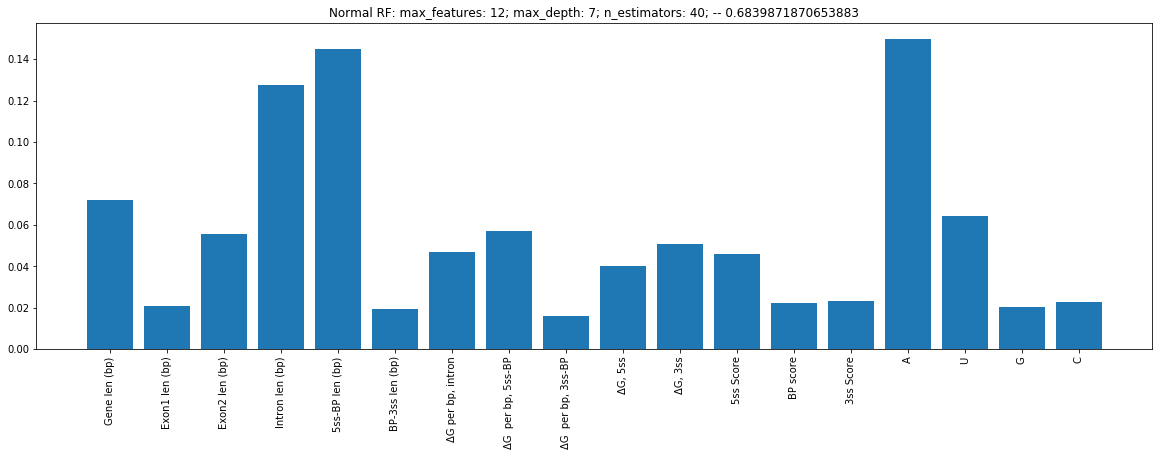

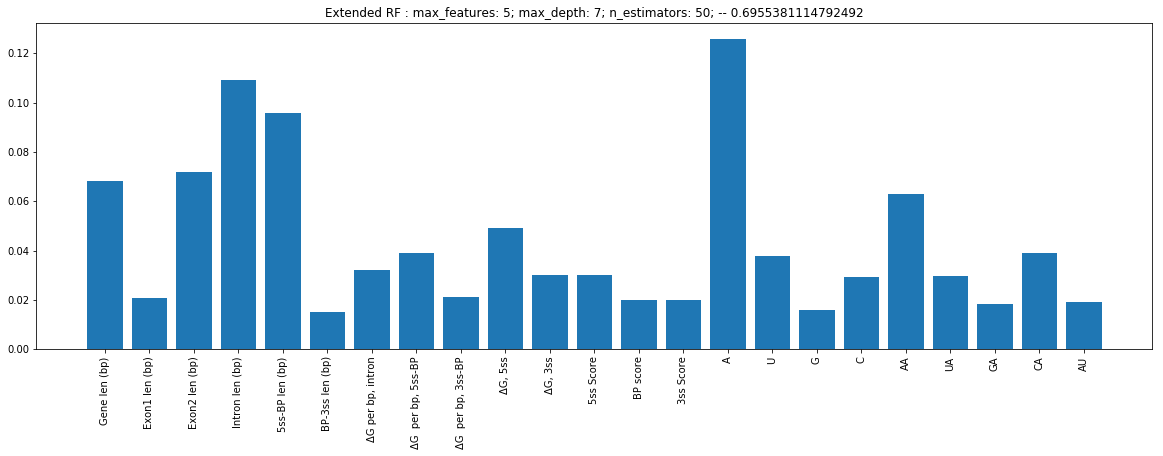

In [15]:
best_RFs(results_1_full,results_2_full,'cut')

## MSE Results

Normal best: 0.6839871870653883 | max_features: 12; max_depth: 7; n_estimators: 40;

Extended best: 0.695538111479249 | max_features: 5; max_depth: 7; n_estimators: 50;

Best difference: 0.08235234031060501 | max_features: 12; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.46275664633060276
Mean squared error:               0.02801978413615613
Mean absolute error:              0.1249529426526229
Root mean squared error:          0.16739111128180054
Correlation Coefficient:          0.6839871870653883


Extended feature space
Coefficient of determination R^2: 0.46177284867054846
Mean squared error:               0.028071093841302037
Mean absolute error:              0.12581442108330093
Root mean squared error:          0.1675443041147685
Correlation Coefficient:          0.6955381114792492


# RP Genes

In [16]:
X,y,X2,y2 = get_data('rp_cut')

mxf = [5,7,10,12,15,18,20,25,30,50,80,10]
md = [5,7,10,12,15,18,20]
n_est = [10,20,30,40,50,60,80,90,100,120,140,160]

results_1_rp = np.zeros((len(mxf),len(md),len(n_est)))
results_2_rp = np.zeros((len(mxf),len(md),len(n_est)))

f = FloatProgress(min=0, max=(len(mxf)*len(md)*len(n_est)))
display(f)


i = 0
for max_features in mxf:
    j = 0
    for max_depth in md:
        k = 0
        for n_estimators in n_est:            
            
            kf = KFold(n_splits=5,shuffle=True,random_state=0)

            rfr1 = ExtraTreesRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            rfr2 = ExtraTreesRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
            predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
            
            print('max_features: {}; max_depth: {}; n_estimators: {};\n'.format(max_features,max_depth,n_estimators))

            print('Normal feature space')
            print_stats(y, predictions_rfr1)
            print('\n')
            print('Extended feature space')
            print_stats(y2, predictions_rfr2)
            print('-------------------------------------------------------\n')
            

            results_1_rp[i][j][k]=np.corrcoef(y, predictions_rfr1)[0][1]
            results_2_rp[i][j][k]=np.corrcoef(y2, predictions_rfr2)[0][1]
            
            f.value += 1
            
            k += 1
        j += 1
    i += 1

FloatProgress(value=0.0, max=1008.0)

max_features: 5; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.22006626469938562
Mean squared error:               0.023103063028330338
Mean absolute error:              0.10516115559292182
Root mean squared error:          0.15199691782510044
Correlation Coefficient:          0.47707155767221454


Extended feature space
Coefficient of determination R^2: 0.255714399876972
Mean squared error:               0.022047100096386153
Mean absolute error:              0.10769537900084442
Root mean squared error:          0.14848265924472848
Correlation Coefficient:          0.525975953279493
-------------------------------------------------------

max_features: 5; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2698798386815092
Mean squared error:               0.02162749390330484
Mean absolute error:              0.1027934816773883
Root mean squared error:          0.14706289097969222
Correlation Coefficient:

max_features: 5; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2656297215916673
Mean squared error:               0.021753390141100677
Mean absolute error:              0.10160775466588905
Root mean squared error:          0.14749030524444878
Correlation Coefficient:          0.521140662543783


Extended feature space
Coefficient of determination R^2: 0.2670146971360866
Mean squared error:               0.021712364633615627
Mean absolute error:              0.10412117324128016
Root mean squared error:          0.14735116095102754
Correlation Coefficient:          0.5203084207289004
-------------------------------------------------------

max_features: 5; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2844470383142007
Mean squared error:               0.021195986820038818
Mean absolute error:              0.10096841806868882
Root mean squared error:          0.1455884158167772
Correlation Coefficient:

max_features: 5; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2358275379574707
Mean squared error:               0.022636185301406618
Mean absolute error:              0.10258609066220277
Root mean squared error:          0.1504532661706173
Correlation Coefficient:          0.4884861546831377


Extended feature space
Coefficient of determination R^2: 0.28300231603210635
Mean squared error:               0.021238782135116187
Mean absolute error:              0.1037006469302055
Root mean squared error:          0.14573531533268175
Correlation Coefficient:          0.5394455749626573
-------------------------------------------------------

max_features: 5; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.25288814752556377
Mean squared error:               0.022130818857677308
Mean absolute error:              0.10327419350501744
Root mean squared error:          0.1487643063966532
Correlation Coefficie

max_features: 5; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.23332127533454738
Mean squared error:               0.022710425381970167
Mean absolute error:              0.10412435846560848
Root mean squared error:          0.15069978560691508
Correlation Coefficient:          0.4845427417630188


Extended feature space
Coefficient of determination R^2: 0.23158364618770144
Mean squared error:               0.022761897133841462
Mean absolute error:              0.10644595377004862
Root mean squared error:          0.15087046474986898
Correlation Coefficient:          0.4814451693514152
-------------------------------------------------------

max_features: 5; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.26660350238990727
Mean squared error:               0.021724544973698287
Mean absolute error:              0.10303110414926207
Root mean squared error:          0.1473924861507475
Correlation Coeffi

max_features: 5; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.22814872723255963
Mean squared error:               0.022863645712632275
Mean absolute error:              0.10788194444444443
Root mean squared error:          0.15120729384732826
Correlation Coefficient:          0.4791474961346954


Extended feature space
Coefficient of determination R^2: 0.1924986322700447
Mean squared error:               0.02391966669698871
Mean absolute error:              0.10978766439909297
Root mean squared error:          0.15465984190147328
Correlation Coefficient:          0.4428307297790438
-------------------------------------------------------

max_features: 5; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.26881683674684453
Mean squared error:               0.021658981963872354
Mean absolute error:              0.10283978174603178
Root mean squared error:          0.14716990848632186
Correlation Coeffic

max_features: 5; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2309408475037934
Mean squared error:               0.022780938005952385
Mean absolute error:              0.1061541666666667
Root mean squared error:          0.15093355493710597
Correlation Coefficient:          0.4825944263747633


Extended feature space
Coefficient of determination R^2: 0.19080864969461353
Mean squared error:               0.0239697270703125
Mean absolute error:              0.10836264880952383
Root mean squared error:          0.15482159755768088
Correlation Coefficient:          0.44068959117363876
-------------------------------------------------------

max_features: 5; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.26350145021124416
Mean squared error:               0.02181643343005952
Mean absolute error:              0.10260208333333337
Root mean squared error:          0.14770387073485758
Correlation Coefficie

max_features: 5; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.23101019087364694
Mean squared error:               0.02277888392857143
Mean absolute error:              0.10614642857142857
Root mean squared error:          0.1509267502087401
Correlation Coefficient:          0.4826630984327184


Extended feature space
Coefficient of determination R^2: 0.1940810731675161
Mean squared error:               0.02387279190476191
Mean absolute error:              0.10791904761904762
Root mean squared error:          0.1545082260100151
Correlation Coefficient:          0.44420546622528984
-------------------------------------------------------

max_features: 5; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.26281766417014363
Mean squared error:               0.021836688422619047
Mean absolute error:              0.10262321428571433
Root mean squared error:          0.14777242104878383
Correlation Coefficie

max_features: 7; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.21770605099035367
Mean squared error:               0.023172976873073927
Mean absolute error:              0.10768761756541516
Root mean squared error:          0.1522267285107117
Correlation Coefficient:          0.4686588633538762


Extended feature space
Coefficient of determination R^2: 0.2730314635337787
Mean squared error:               0.021534137013728097
Mean absolute error:              0.1030593674142519
Root mean squared error:          0.14674514306691072
Correlation Coefficient:          0.5243232035638233
-------------------------------------------------------

max_features: 7; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2592155429730951
Mean squared error:               0.02194338983747581
Mean absolute error:              0.10498616347066726
Root mean squared error:          0.14813301400253695
Correlation Coefficient:

max_features: 7; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.18117564537187114
Mean squared error:               0.02425507426834685
Mean absolute error:              0.10833916364051913
Root mean squared error:          0.155740406665537
Correlation Coefficient:          0.43405340494499745


Extended feature space
Coefficient of determination R^2: 0.23255947331074966
Mean squared error:               0.02273299135055739
Mean absolute error:              0.10926281611838817
Root mean squared error:          0.1507746376236978
Correlation Coefficient:          0.4884184781130267
-------------------------------------------------------

max_features: 7; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2427541384274
Mean squared error:               0.022431006733041242
Mean absolute error:              0.10438076576515717
Root mean squared error:          0.14976984587373135
Correlation Coefficient:   

max_features: 7; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.11929126731233441
Mean squared error:               0.026088202676656354
Mean absolute error:              0.11425461724849224
Root mean squared error:          0.1615184282880946
Correlation Coefficient:          0.3854021577951431


Extended feature space
Coefficient of determination R^2: 0.23147948384756634
Mean squared error:               0.02276498261277435
Mean absolute error:              0.10716589315788208
Root mean squared error:          0.15088068999303506
Correlation Coefficient:          0.4861336518505577
-------------------------------------------------------

max_features: 7; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2005714182023539
Mean squared error:               0.023680536019897953
Mean absolute error:              0.10923498926759906
Root mean squared error:          0.1538848141302382
Correlation Coefficie

max_features: 7; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.1514230149099467
Mean squared error:               0.025136401573102454
Mean absolute error:              0.11171290761156834
Root mean squared error:          0.1585446359013841
Correlation Coefficient:          0.4152735193148868


Extended feature space
Coefficient of determination R^2: 0.23529838676979853
Mean squared error:               0.022651859726921235
Mean absolute error:              0.10438916696503162
Root mean squared error:          0.15050534783495648
Correlation Coefficient:          0.4929140582221411
-------------------------------------------------------

max_features: 7; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.22126895046202377
Mean squared error:               0.023067437277423698
Mean absolute error:              0.10857977389343464
Root mean squared error:          0.15187968026508253
Correlation Coeffic

max_features: 7; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.16323017172488719
Mean squared error:               0.0247866520037037
Mean absolute error:              0.11310230158730158
Root mean squared error:          0.15743777184558888
Correlation Coefficient:          0.41963021298981684


Extended feature space
Coefficient of determination R^2: 0.23982348026498956
Mean squared error:               0.022517818185317458
Mean absolute error:              0.10336551587301586
Root mean squared error:          0.15005938219690715
Correlation Coefficient:          0.49914408331658094
-------------------------------------------------------

max_features: 7; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.20978772923320932
Mean squared error:               0.023407532038921954
Mean absolute error:              0.11116347222222224
Root mean squared error:          0.15299520266636452
Correlation Coeff

max_features: 7; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.1743836296488377
Mean squared error:               0.024456266190476198
Mean absolute error:              0.11282619047619047
Root mean squared error:          0.1563849934951439
Correlation Coefficient:          0.42967572450962555


Extended feature space
Coefficient of determination R^2: 0.2167235255950054
Mean squared error:               0.02320208107142857
Mean absolute error:              0.1049297619047619
Root mean squared error:          0.15232229341573272
Correlation Coefficient:          0.4811709889360552
-------------------------------------------------------

max_features: 7; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.22166847638264553
Mean squared error:               0.023055602589285712
Mean absolute error:              0.10935654761904766
Root mean squared error:          0.15184071453100353
Correlation Coefficie

max_features: 7; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.17857936519787432
Mean squared error:               0.02433198083333334
Mean absolute error:              0.11236071428571426
Root mean squared error:          0.15598711752363828
Correlation Coefficient:          0.43399807040758925


Extended feature space
Coefficient of determination R^2: 0.21515103655553225
Mean squared error:               0.023248661071428575
Mean absolute error:              0.10495833333333335
Root mean squared error:          0.1524751162368095
Correlation Coefficient:          0.479898501787651
-------------------------------------------------------

max_features: 7; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.22126487178686471
Mean squared error:               0.023067558095238094
Mean absolute error:              0.10981190476190478
Root mean squared error:          0.15188007800642617
Correlation Coeffic

max_features: 10; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2675737626165329
Mean squared error:               0.021695804092063037
Mean absolute error:              0.10951453159886929
Root mean squared error:          0.14729495609851356
Correlation Coefficient:          0.5181633439466314


Extended feature space
Coefficient of determination R^2: 0.28428729434080946
Mean squared error:               0.021200718728556955
Mean absolute error:              0.104237050723741
Root mean squared error:          0.1456046658886897
Correlation Coefficient:          0.5402592770868744
-------------------------------------------------------

max_features: 10; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.33753177039489357
Mean squared error:               0.019623520012163696
Mean absolute error:              0.10128159857067079
Root mean squared error:          0.1400839748585244
Correlation Coefficien

max_features: 10; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30650244208757926
Mean squared error:               0.020542665441017762
Mean absolute error:              0.10592612336483664
Root mean squared error:          0.14332712737307535
Correlation Coefficient:          0.5537629701984873


Extended feature space
Coefficient of determination R^2: 0.2790913014820996
Mean squared error:               0.02135463353577229
Mean absolute error:              0.10687777008805362
Root mean squared error:          0.14613224673484046
Correlation Coefficient:          0.5299099449720177
-------------------------------------------------------

max_features: 10; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3153403834255586
Mean squared error:               0.020280869462038442
Mean absolute error:              0.10231306628293033
Root mean squared error:          0.14241091763638924
Correlation Coeffici

max_features: 10; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.29640140821373917
Mean squared error:               0.020841876529955568
Mean absolute error:              0.10691877961192245
Root mean squared error:          0.14436715876526618
Correlation Coefficient:          0.5444370663908964


Extended feature space
Coefficient of determination R^2: 0.25770878927278495
Mean squared error:               0.02198802263655972
Mean absolute error:              0.1104475533824641
Root mean squared error:          0.1482835885611072
Correlation Coefficient:          0.5085057117969473
-------------------------------------------------------

max_features: 10; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3494123865254881
Mean squared error:               0.01927159444354506
Mean absolute error:              0.09955685230972727
Root mean squared error:          0.13882216841536896
Correlation Coeffici

max_features: 10; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.22139332680718704
Mean squared error:               0.023063753022708865
Mean absolute error:              0.11019856245275889
Root mean squared error:          0.15186755092088916
Correlation Coefficient:          0.48052520540180876


Extended feature space
Coefficient of determination R^2: 0.2672102110178083
Mean squared error:               0.021706573155022144
Mean absolute error:              0.10875314935064932
Root mean squared error:          0.14733150767918635
Correlation Coefficient:          0.517721481191006
-------------------------------------------------------

max_features: 10; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.29943799220367107
Mean squared error:               0.020751927361026268
Mean absolute error:              0.103493101229128
Root mean squared error:          0.14405529272132372
Correlation Coeffi

max_features: 10; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2438002583004727
Mean squared error:               0.02240001875
Mean absolute error:              0.10765833333333334
Root mean squared error:          0.14966635811029813
Correlation Coefficient:          0.4987226265820244


Extended feature space
Coefficient of determination R^2: 0.2639672958883049
Mean squared error:               0.02180263422949736
Mean absolute error:              0.10608432539682539
Root mean squared error:          0.14765715095957038
Correlation Coefficient:          0.5146510053210073
-------------------------------------------------------

max_features: 10; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3096544252934972
Mean squared error:               0.020449297936350853
Mean absolute error:              0.10213252976190479
Root mean squared error:          0.14300104173169806
Correlation Coefficient:  

max_features: 10; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2595045216122649
Mean squared error:               0.021934829761904768
Mean absolute error:              0.10444047619047621
Root mean squared error:          0.14810411797753892
Correlation Coefficient:          0.5127195008542818


Extended feature space
Coefficient of determination R^2: 0.2621620374128578
Mean squared error:               0.021856109285714288
Mean absolute error:              0.10792142857142856
Root mean squared error:          0.14783811851384707
Correlation Coefficient:          0.513189231348887
-------------------------------------------------------

max_features: 10; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3192243706317591
Mean squared error:               0.02016581866071428
Mean absolute error:              0.10154107142857141
Root mean squared error:          0.14200640359052222
Correlation Coeffici

max_features: 10; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.259504521612265
Mean squared error:               0.021934829761904764
Mean absolute error:              0.10444047619047621
Root mean squared error:          0.14810411797753892
Correlation Coefficient:          0.5127195008542818


Extended feature space
Coefficient of determination R^2: 0.262623497309018
Mean squared error:               0.02184244
Mean absolute error:              0.10788095238095237
Root mean squared error:          0.1477918806971479
Correlation Coefficient:          0.5133183317683204
-------------------------------------------------------

max_features: 10; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3192243706317591
Mean squared error:               0.02016581866071428
Mean absolute error:              0.10154107142857141
Root mean squared error:          0.14200640359052222
Correlation Coefficient:        

max_features: 12; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.21571438005257293
Mean squared error:               0.02323197380720386
Mean absolute error:              0.11284562480002727
Root mean squared error:          0.152420385143208
Correlation Coefficient:          0.46622905165874845


Extended feature space
Coefficient of determination R^2: 0.34097657473698206
Mean squared error:               0.01952147861014015
Mean absolute error:              0.09976350571513505
Root mean squared error:          0.13971928503302666
Correlation Coefficient:          0.5887933058857238
-------------------------------------------------------

max_features: 12; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.30588148103682433
Mean squared error:               0.020561059442513543
Mean absolute error:              0.10494790655873312
Root mean squared error:          0.14339128091524095
Correlation Coeffici

max_features: 12; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.17294929378232526
Mean squared error:               0.02449875384093673
Mean absolute error:              0.11364883357628257
Root mean squared error:          0.15652077766525674
Correlation Coefficient:          0.43699995672444525


Extended feature space
Coefficient of determination R^2: 0.2734392055374364
Mean squared error:               0.021522058950190853
Mean absolute error:              0.10339616110235857
Root mean squared error:          0.1467039840978794
Correlation Coefficient:          0.5240607727772351
-------------------------------------------------------

max_features: 12; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.29472806389218964
Mean squared error:               0.020891444047783165
Mean absolute error:              0.10692003665382672
Root mean squared error:          0.14453872853938893
Correlation Coeffic

max_features: 12; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.19805630421718712
Mean squared error:               0.023755038293992232
Mean absolute error:              0.11374152818098773
Root mean squared error:          0.1541266955916211
Correlation Coefficient:          0.456679492959665


Extended feature space
Coefficient of determination R^2: 0.2675534000930406
Mean squared error:               0.021696407267233393
Mean absolute error:              0.10424378278630093
Root mean squared error:          0.1472970035921756
Correlation Coefficient:          0.5174870777072731
-------------------------------------------------------

max_features: 12; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.307021787820399
Mean squared error:               0.020527281471001125
Mean absolute error:              0.10597444522615714
Root mean squared error:          0.14327344998638486
Correlation Coefficie

max_features: 12; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.23490470897946503
Mean squared error:               0.022663521182749176
Mean absolute error:              0.11175196234049178
Root mean squared error:          0.15054408385170498
Correlation Coefficient:          0.4957290467416176


Extended feature space
Coefficient of determination R^2: 0.28075419389554956
Mean squared error:               0.021305375622569626
Mean absolute error:              0.10539071943929083
Root mean squared error:          0.14596361061089722
Correlation Coefficient:          0.5302444409256688
-------------------------------------------------------

max_features: 12; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3116502663028532
Mean squared error:               0.020390177477077595
Mean absolute error:              0.10314455779534037
Root mean squared error:          0.1427941787226552
Correlation Coeff

max_features: 12; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2609779441119652
Mean squared error:               0.02189118429391534
Mean absolute error:              0.1068251984126984
Root mean squared error:          0.14795669736079994
Correlation Coefficient:          0.5147879061116637


Extended feature space
Coefficient of determination R^2: 0.31829003882765805
Mean squared error:               0.020193495276793982
Mean absolute error:              0.10033977182539681
Root mean squared error:          0.14210381865662156
Correlation Coefficient:          0.5652228847748099
-------------------------------------------------------

max_features: 12; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3040874529018407
Mean squared error:               0.020614201835515877
Mean absolute error:              0.10272827380952383
Root mean squared error:          0.14357646685831169
Correlation Coeffic

max_features: 12; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.25452079934369587
Mean squared error:               0.022082456726190476
Mean absolute error:              0.10738809523809521
Root mean squared error:          0.14860167134386637
Correlation Coefficient:          0.5102386574533243


Extended feature space
Coefficient of determination R^2: 0.32370209638919656
Mean squared error:               0.020033180238095236
Mean absolute error:              0.10006428571428569
Root mean squared error:          0.1415386174798074
Correlation Coefficient:          0.5705745178565989
-------------------------------------------------------

max_features: 12; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3082646564017095
Mean squared error:               0.020490465431547616
Mean absolute error:              0.10215595238095242
Root mean squared error:          0.1431449106030236
Correlation Coeffi

max_features: 12; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.25575413010891046
Mean squared error:               0.022045923214285713
Mean absolute error:              0.10729404761904761
Root mean squared error:          0.14847869616307152
Correlation Coefficient:          0.5112633859317405


Extended feature space
Coefficient of determination R^2: 0.32003942976969146
Mean squared error:               0.02014167511904762
Mean absolute error:              0.10059880952380953
Root mean squared error:          0.1419213694939829
Correlation Coefficient:          0.5671010026757142
-------------------------------------------------------

max_features: 12; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3091494884310715
Mean squared error:               0.020464255089285715
Mean absolute error:              0.10206130952380954
Root mean squared error:          0.1430533295288359
Correlation Coeffic

max_features: 15; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.19246183479271672
Mean squared error:               0.023920756705536245
Mean absolute error:              0.10730915236635061
Root mean squared error:          0.15466336575135123
Correlation Coefficient:          0.44582579227461283


Extended feature space
Coefficient of determination R^2: 0.411112065203158
Mean squared error:               0.017443937168573467
Mean absolute error:              0.0956529955848757
Root mean squared error:          0.13207549798722498
Correlation Coefficient:          0.6501022065229568
-------------------------------------------------------

max_features: 15; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2846402243693288
Mean squared error:               0.02119026429592451
Mean absolute error:              0.10382499412996561
Root mean squared error:          0.1455687614013546
Correlation Coefficien

max_features: 15; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2063214182637778
Mean squared error:               0.02351021050656344
Mean absolute error:              0.10873990056173856
Root mean squared error:          0.15333039655124955
Correlation Coefficient:          0.4675287188858167


Extended feature space
Coefficient of determination R^2: 0.35399919041340433
Mean squared error:               0.019135724927296642
Mean absolute error:              0.10085290278391724
Root mean squared error:          0.13833193748117836
Correlation Coefficient:          0.596432232182975
-------------------------------------------------------

max_features: 15; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.28798602811660934
Mean squared error:               0.02109115547250113
Mean absolute error:              0.1026361434779153
Root mean squared error:          0.14522794315317258
Correlation Coefficien

max_features: 15; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.24907934624357164
Mean squared error:               0.022243642514479807
Mean absolute error:              0.10482188551527838
Root mean squared error:          0.14914302703941545
Correlation Coefficient:          0.5045704968929412


Extended feature space
Coefficient of determination R^2: 0.2989269620193554
Mean squared error:               0.020767065009294646
Mean absolute error:              0.10589261586958014
Root mean squared error:          0.14410782424731367
Correlation Coefficient:          0.5477996851835737
-------------------------------------------------------

max_features: 15; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3162172985678121
Mean squared error:               0.020254893632445467
Mean absolute error:              0.09971028552145411
Root mean squared error:          0.1423196881406275
Correlation Coeffi

max_features: 15; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.19133666401739846
Mean squared error:               0.02395408632081413
Mean absolute error:              0.10935793521954237
Root mean squared error:          0.15477107714561572
Correlation Coefficient:          0.460348800977749


Extended feature space
Coefficient of determination R^2: 0.3786161470792344
Mean squared error:               0.01840652566885305
Mean absolute error:              0.10060477654950864
Root mean squared error:          0.13567065146468874
Correlation Coefficient:          0.6158315668884873
-------------------------------------------------------

max_features: 15; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3089681928306903
Mean squared error:               0.0204696253963936
Mean absolute error:              0.09970949162279522
Root mean squared error:          0.14307209859505662
Correlation Coefficien

max_features: 15; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.20757206446430698
Mean squared error:               0.023473164079810493
Mean absolute error:              0.1042233843537415
Root mean squared error:          0.1532095430441932
Correlation Coefficient:          0.4745311911668301


Extended feature space
Coefficient of determination R^2: 0.3572106494471965
Mean squared error:               0.019040595639880954
Mean absolute error:              0.10403690476190475
Root mean squared error:          0.1379876648105944
Correlation Coefficient:          0.5982099560290796
-------------------------------------------------------

max_features: 15; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2970638178885848
Mean squared error:               0.02082225474444242
Mean absolute error:              0.10027240646258503
Root mean squared error:          0.14429918483637535
Correlation Coefficie

max_features: 15; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.20029311818625106
Mean squared error:               0.023688779775132274
Mean absolute error:              0.10492896825396825
Root mean squared error:          0.15391159727301992
Correlation Coefficient:          0.46727514454869973


Extended feature space
Coefficient of determination R^2: 0.37067746152428016
Mean squared error:               0.01864168404761905
Mean absolute error:              0.10196190476190477
Root mean squared error:          0.1365345525777964
Correlation Coefficient:          0.6107737419732754
-------------------------------------------------------

max_features: 15; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.29772753234673854
Mean squared error:               0.02080259430886243
Mean absolute error:              0.09975376984126985
Root mean squared error:          0.1442310448858443
Correlation Coeffi

max_features: 15; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.19976409273208873
Mean squared error:               0.023704450476190478
Mean absolute error:              0.10498333333333333
Root mean squared error:          0.15396249697959072
Correlation Coefficient:          0.4669523227856072


Extended feature space
Coefficient of determination R^2: 0.37067746152428016
Mean squared error:               0.01864168404761905
Mean absolute error:              0.10196190476190477
Root mean squared error:          0.1365345525777964
Correlation Coefficient:          0.6107737419732753
-------------------------------------------------------

max_features: 15; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.29747639914697777
Mean squared error:               0.02081003333333333
Mean absolute error:              0.0997702380952381
Root mean squared error:          0.14425683114963161
Correlation Coeffic

max_features: 18; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.19832438814692344
Mean squared error:               0.023747097157912008
Mean absolute error:              0.11047260464500527
Root mean squared error:          0.15410093172304964
Correlation Coefficient:          0.46142356232507314


Extended feature space
Coefficient of determination R^2: 0.2775065806717182
Mean squared error:               0.02140157586318737
Mean absolute error:              0.10595573610152889
Root mean squared error:          0.1462927744736129
Correlation Coefficient:          0.5282106470511505
-------------------------------------------------------

max_features: 18; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.28166995509825377
Mean squared error:               0.021278249101652023
Mean absolute error:              0.10353562227685102
Root mean squared error:          0.1458706588099609
Correlation Coeffici

max_features: 18; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.16677427499300956
Mean squared error:               0.0246816691859637
Mean absolute error:              0.10820836496663516
Root mean squared error:          0.1571040075426585
Correlation Coefficient:          0.44472843501103215


Extended feature space
Coefficient of determination R^2: 0.25728117436457854
Mean squared error:               0.022000689371859148
Mean absolute error:              0.10791257257408858
Root mean squared error:          0.14832629359577199
Correlation Coefficient:          0.5072884704543161
-------------------------------------------------------

max_features: 18; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.24550735820853165
Mean squared error:               0.022349451329991762
Mean absolute error:              0.10412914241862607
Root mean squared error:          0.14949732883898548
Correlation Coeffic

max_features: 18; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.15091246564119642
Mean squared error:               0.025151524975772627
Mean absolute error:              0.1158229977324263
Root mean squared error:          0.158592323193062
Correlation Coefficient:          0.4361005294565416


Extended feature space
Coefficient of determination R^2: 0.2696277576200663
Mean squared error:               0.021634961005171538
Mean absolute error:              0.10272674606614206
Root mean squared error:          0.14708827623291917
Correlation Coefficient:          0.5206379026977932
-------------------------------------------------------

max_features: 18; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2583734738665533
Mean squared error:               0.02196833346378933
Mean absolute error:              0.10749218444221122
Root mean squared error:          0.14821718342955154
Correlation Coefficie

max_features: 18; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.18138426649237938
Mean squared error:               0.0242488945293793
Mean absolute error:              0.11164739435168008
Root mean squared error:          0.1557205655312724
Correlation Coefficient:          0.4628682504925478


Extended feature space
Coefficient of determination R^2: 0.26372306924574274
Mean squared error:               0.02180986866911823
Mean absolute error:              0.10391181837342552
Root mean squared error:          0.14768164635159722
Correlation Coefficient:          0.5154269502489847
-------------------------------------------------------

max_features: 18; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.266800215897395
Mean squared error:               0.021718717959996588
Mean absolute error:              0.10480588467584004
Root mean squared error:          0.14737271782795006
Correlation Coefficie

max_features: 18; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.15115483667600982
Mean squared error:               0.025144345502645497
Mean absolute error:              0.11505634920634919
Root mean squared error:          0.1585696865817849
Correlation Coefficient:          0.44138778579614424


Extended feature space
Coefficient of determination R^2: 0.2616456507496838
Mean squared error:               0.021871405602678577
Mean absolute error:              0.10552946428571428
Root mean squared error:          0.14788984279753148
Correlation Coefficient:          0.5139253083360018
-------------------------------------------------------

max_features: 18; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2433915740957363
Mean squared error:               0.022412124723255628
Mean absolute error:              0.10856225198412703
Root mean squared error:          0.1497067958486041
Correlation Coeffi

max_features: 18; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.1434129397370968
Mean squared error:               0.02537367464285714
Mean absolute error:              0.11562261904761903
Root mean squared error:          0.1592911631034727
Correlation Coefficient:          0.4347841851164767


Extended feature space
Coefficient of determination R^2: 0.24671655004978454
Mean squared error:               0.022313632857142857
Mean absolute error:              0.10705714285714286
Root mean squared error:          0.14937748443839471
Correlation Coefficient:          0.5006155363174495
-------------------------------------------------------

max_features: 18; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.25126566179079246
Mean squared error:               0.02217887985119048
Mean absolute error:              0.1080232142857143
Root mean squared error:          0.1489257528139122
Correlation Coefficie

max_features: 18; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.14341293973709657
Mean squared error:               0.025373674642857145
Mean absolute error:              0.11562261904761906
Root mean squared error:          0.15929116310347272
Correlation Coefficient:          0.4347841851164763


Extended feature space
Coefficient of determination R^2: 0.24671655004978454
Mean squared error:               0.022313632857142857
Mean absolute error:              0.10705714285714285
Root mean squared error:          0.14937748443839471
Correlation Coefficient:          0.5006155363174496
-------------------------------------------------------

max_features: 18; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2509817133658966
Mean squared error:               0.02218729092261905
Mean absolute error:              0.10809107142857144
Root mean squared error:          0.14895398928064682
Correlation Coeff

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/runpy.py in _run_code(code=<code object <module> at 0x7f79ed628ae0, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5...ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/ghrist.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f79ed628ae0, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5...ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/ghrist.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 28, 15, 24, 53, 162037, tzinfo=tzutc()), 'msg_id': '1f9275b16d6342339a5d4a8f566a7aee', 'msg_type': 'execute_request', 'session': '688c6bb77c35485b9048d72f0683fe03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '1f9275b16d6342339a5d4a8f566a7aee', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'688c6bb77c35485b9048d72f0683fe03']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 28, 15, 24, 53, 162037, tzinfo=tzutc()), 'msg_id': '1f9275b16d6342339a5d4a8f566a7aee', 'msg_type': 'execute_request', 'session': '688c6bb77c35485b9048d72f0683fe03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '1f9275b16d6342339a5d4a8f566a7aee', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'688c6bb77c35485b9048d72f0683fe03'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 28, 15, 24, 53, 162037, tzinfo=tzutc()), 'msg_id': '1f9275b16d6342339a5d4a8f566a7aee', 'msg_type': 'execute_request', 'session': '688c6bb77c35485b9048d72f0683fe03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '1f9275b16d6342339a5d4a8f566a7aee', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1", store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.For object>], cell_name='<ipython-input-16-372f183f5fa2>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f799d277978, executi..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f799cfb45d0, file "<ipython-input-16-372f183f5fa2>", line 15>
        result = <ExecutionResult object at 7f799d277978, executi..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f799cfb45d0, file "<ipython-input-16-372f183f5fa2>", line 15>, result=<ExecutionResult object at 7f799d277978, executi..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f799cfb45d0, file "<ipython-input-16-372f183f5fa2>", line 15>
        self.user_global_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'ExtraTreesRegressor': <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>, 'FloatProgress': <class 'ipywidgets.widgets.widget_float.FloatProgress'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', "from __future__ import print_function, division\n..._ipython().run_line_magic('matplotlib', 'inline')", "def fit_scatter(y_true, y_pred):\n    assert y_tr....set_ylabel('Predicted AUC')\n    ax.set_title('')", "def print_stats(true,predictions):\n    print('Co...{}'.format(np.corrcoef(true, predictions)[0][1]))", 'def get_best_settings(results_1,results_2):\n    ...t_k_1],mxf[best_i_2],md[best_j_2],n_est[best_k_2]', "data_path = os.path.join(os.getcwd(), 'datasets'...res_cut.shape[0],extended_features_cut.shape[1]))", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', 'kf = KFold(n_splits=5,shuffle=True,random_state=0)', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", "X,y,X2,y2 = get_data('cut')\n\nrfr1 = ExtraTreesRe...forrest regression extended features importance')", 'def best_RFs(results1,results2,dataset):\n     \n ...ettings,np.corrcoef(y2, predictions_rfr2)[0][1]))', "X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1", 'get_best_settings(results_1_full,results_2_full)', "best_RFs(results_1_full,results_2_full,'cut')", "X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1"], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, ...}
        self.user_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'ExtraTreesRegressor': <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>, 'FloatProgress': <class 'ipywidgets.widgets.widget_float.FloatProgress'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', "from __future__ import print_function, division\n..._ipython().run_line_magic('matplotlib', 'inline')", "def fit_scatter(y_true, y_pred):\n    assert y_tr....set_ylabel('Predicted AUC')\n    ax.set_title('')", "def print_stats(true,predictions):\n    print('Co...{}'.format(np.corrcoef(true, predictions)[0][1]))", 'def get_best_settings(results_1,results_2):\n    ...t_k_1],mxf[best_i_2],md[best_j_2],n_est[best_k_2]', "data_path = os.path.join(os.getcwd(), 'datasets'...res_cut.shape[0],extended_features_cut.shape[1]))", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', 'kf = KFold(n_splits=5,shuffle=True,random_state=0)', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", "X,y,X2,y2 = get_data('cut')\n\nrfr1 = ExtraTreesRe...forrest regression extended features importance')", 'def best_RFs(results1,results2,dataset):\n     \n ...ettings,np.corrcoef(y2, predictions_rfr2)[0][1]))', "X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1", 'get_best_settings(results_1_full,results_2_full)', "best_RFs(results_1_full,results_2_full,'cut')", "X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1"], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/home/ghristov/Random-forest-regression-on-mRNA-data/<ipython-input-16-372f183f5fa2> in <module>()
     32                                         max_features=max_features, 
     33                                         max_depth=max_depth, 
     34                                         n_jobs=2,
     35                                         random_state=1337)
     36 
---> 37             predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
     38             predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
     39             
     40             print('max_features: {}; max_depth: {}; n_estimators: {};\n'.format(max_features,max_depth,n_estimators))
     41 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/model_selection/_validation.py in cross_val_predict(estimator=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=    Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...08  0.344  0.169  0.179  

[84 rows x 18 columns], y=0     0.805
1     0.929
2     0.735
3     0.639
...83    0.721
Name: AUC, Length: 84, dtype: float64, groups=None, cv=KFold(n_splits=5, random_state=0, shuffle=True), n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', method='predict')
    675     # independent, and that it is pickle-able.
    676     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
    677                         pre_dispatch=pre_dispatch)
    678     prediction_blocks = parallel(delayed(_fit_and_predict)(
    679         clone(estimator), X, y, train, test, verbose, fit_params, method)
--> 680         for train, test in cv.split(X, y, groups))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=0, shuffle=True)>
        X =     Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...08  0.344  0.169  0.179  

[84 rows x 18 columns]
        y = 0     0.805
1     0.929
2     0.735
3     0.639
...83    0.721
Name: AUC, Length: 84, dtype: float64
        groups = None
    681 
    682     # Concatenate the predictions
    683     predictions = [pred_block_i for pred_block_i, _ in prediction_blocks]
    684     test_indices = np.concatenate([indices_i

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object cross_val_predict.<locals>.<genexpr>>)
    774         self.n_completed_tasks = 0
    775         try:
    776             # Only set self._iterating to True if at least a batch
    777             # was dispatched. In particular this covers the edge
    778             # case of Parallel used with an exhausted iterator.
--> 779             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object cross_val_predict.<locals>.<genexpr>>
    780                 self._iterating = True
    781             else:
    782                 self._iterating = False
    783 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object cross_val_predict.<locals>.<genexpr>>)
    620             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    621             if len(tasks) == 0:
    622                 # No more tasks available in the iterator: tell caller to stop.
    623                 return False
    624             else:
--> 625                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    626                 return True
    627 
    628     def _print(self, msg, msg_args):
    629         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    583         self.n_dispatched_tasks += len(batch)
    584         self.n_dispatched_batches += 1
    585 
    586         dispatch_timestamp = time.time()
    587         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 588         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    589         self._jobs.append(job)
    590 
    591     def dispatch_next(self):
    592         """Dispatch more data for parallel processing

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    106             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    107         return 1
    108 
    109     def apply_async(self, func, callback=None):
    110         """Schedule a func to be run"""
--> 111         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    112         if callback:
    113             callback(result)
    114         return result
    115 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    327 
    328 class ImmediateResult(object):
    329     def __init__(self, batch):
    330         # Don't delay the application, to avoid keeping the input
    331         # arguments in memory
--> 332         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    333 
    334     def get(self):
    335         return self.results
    336 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_predict>, (ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False),     Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...08  0.344  0.169  0.179  

[84 rows x 18 columns], 0     0.805
1     0.929
2     0.735
3     0.639
...83    0.721
Name: AUC, Length: 84, dtype: float64, array([ 0,  1,  3,  4,  5,  6,  7,  9, 10, 11, 1... 70, 71, 72, 73, 74, 76, 78, 79, 80, 81, 82, 83]), array([ 2,  8, 13, 16, 22, 26, 27, 30, 40, 43, 50, 54, 56, 66, 69, 75, 77]), 0, None, 'predict'), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_predict>
        args = (ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False),     Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...08  0.344  0.169  0.179  

[84 rows x 18 columns], 0     0.805
1     0.929
2     0.735
3     0.639
...83    0.721
Name: AUC, Length: 84, dtype: float64, array([ 0,  1,  3,  4,  5,  6,  7,  9, 10, 11, 1... 70, 71, 72, 73, 74, 76, 78, 79, 80, 81, 82, 83]), array([ 2,  8, 13, 16, 22, 26, 27, 30, 40, 43, 50, 54, 56, 66, 69, 75, 77]), 0, None, 'predict')
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/model_selection/_validation.py in _fit_and_predict(estimator=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=    Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...08  0.344  0.169  0.179  

[84 rows x 18 columns], y=0     0.805
1     0.929
2     0.735
3     0.639
...83    0.721
Name: AUC, Length: 84, dtype: float64, train=array([ 0,  1,  3,  4,  5,  6,  7,  9, 10, 11, 1... 70, 71, 72, 73, 74, 76, 78, 79, 80, 81, 82, 83]), test=array([ 2,  8, 13, 16, 22, 26, 27, 30, 40, 43, 50, 54, 56, 66, 69, 75, 77]), verbose=0, fit_params={}, method='predict')
    748     X_test, _ = _safe_split(estimator, X, y, test, train)
    749 
    750     if y_train is None:
    751         estimator.fit(X_train, **fit_params)
    752     else:
--> 753         estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of ExtraTreesRegres... random_state=1337, verbose=0, warm_start=False)>
        X_train =     Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...08  0.344  0.169  0.179  

[67 rows x 18 columns]
        y_train = 0     0.805
1     0.929
3     0.639
4     0.522
...83    0.721
Name: AUC, Length: 67, dtype: float64
        fit_params = {}
    754     func = getattr(estimator, method)
    755     predictions = func(X_test)
    756     if method in ['decision_function', 'predict_proba', 'predict_log_proba']:
    757         n_classes = len(set(y))

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/ensemble/forest.py in fit(self=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=array([[9.650e+02, 4.000e+00, 5.960e+02, ..., 3....1, 1.690e-01,
        1.790e-01]], dtype=float32), y=array([[0.805],
       [0.929],
       [0.639],
...
       [0.798],
       [0.582],
       [0.721]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 9
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Mar 28 16:48:26 2018
PID: 17417      Python 3.5.4: /home/ghristov/miniconda3/envs/mlp/bin/python
...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), array([[9.650e+02, 4.000e+00, 5.960e+02, ..., 3....1, 1.690e-01,
        1.790e-01]], dtype=float32), array([[0.805],
       [0.929],
       [0.639],
...
       [0.798],
       [0.582],
       [0.721]]), None, 0, 10), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), array([[9.650e+02, 4.000e+00, 5.960e+02, ..., 3....1, 1.690e-01,
        1.790e-01]], dtype=float32), array([[0.805],
       [0.929],
       [0.639],
...
       [0.798],
       [0.582],
       [0.721]]), None, 0, 10)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), forest=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=array([[9.650e+02, 4.000e+00, 5.960e+02, ..., 3....1, 1.690e-01,
        1.790e-01]], dtype=float32), y=array([[0.805],
       [0.929],
       [0.639],
...
       [0.798],
       [0.582],
       [0.721]]), sample_weight=None, tree_idx=0, n_trees=10, verbose=0, class_weight=None)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
    121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
    122     else:
--> 123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeRegressor.fit of Extra...m_state=1125387415,
          splitter='random')>
        X = array([[9.650e+02, 4.000e+00, 5.960e+02, ..., 3....1, 1.690e-01,
        1.790e-01]], dtype=float32)
        y = array([[0.805],
       [0.929],
       [0.639],
...
       [0.798],
       [0.582],
       [0.721]])
        sample_weight = None
    124 
    125     return tree
    126 
    127 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/tree/tree.py in fit(self=ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), X=array([[9.650e+02, 4.000e+00, 5.960e+02, ..., 3....1, 1.690e-01,
        1.790e-01]], dtype=float32), y=array([[0.805],
       [0.929],
       [0.639],
...
       [0.798],
       [0.582],
       [0.721]]), sample_weight=None, check_input=False, X_idx_sorted=None)
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/tree/tree.py in fit(self=ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), X=array([[9.650e+02, 4.000e+00, 5.960e+02, ..., 3....1, 1.690e-01,
        1.790e-01]], dtype=float32), y=array([[0.805],
       [0.929],
       [0.639],
...
       [0.798],
       [0.582],
       [0.721]]), sample_weight=None, check_input=False, X_idx_sorted=None)
    237         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    238             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    239         if max_depth <= 0:
    240             raise ValueError("max_depth must be greater than zero. ")
    241         if not (0 < max_features <= self.n_features_):
--> 242             raise ValueError("max_features must be in (0, n_features]")
    243         if not isinstance(max_leaf_nodes, (numbers.Integral, np.integer)):
    244             raise ValueError("max_leaf_nodes must be integral number but was "
    245                              "%r" % max_leaf_nodes)
    246         if -1 < max_leaf_nodes < 2:

ValueError: max_features must be in (0, n_features]
___________________________________________________________________________

In [17]:
get_best_settings(results_1_rp,results_2_rp)

Normal best: 0.6089742911774628 | max_features: 10; max_depth: 5; n_estimators: 40;
Extended best: 0.6501022065229568 | max_features: 15; max_depth: 5; n_estimators: 10;
Best difference: 0.20427641424834397 | max_features: 15; max_depth: 5; n_estimators: 10;


(10, 5, 40, 15, 5, 10)

Normal best: 0.6089742911774628 | max_features: 10; max_depth: 5; n_estimators: 40;
Extended best: 0.6501022065229568 | max_features: 15; max_depth: 5; n_estimators: 10;
Best difference: 0.20427641424834397 | max_features: 15; max_depth: 5; n_estimators: 10;
Normal feature space
Coefficient of determination R^2: 0.36032501236987124
Mean squared error:               0.018948342516776955
Mean absolute error:              0.09876138238608177
Root mean squared error:          0.1376529785975478
Correlation Coefficient:          0.6089742911774628


Extended feature space
Coefficient of determination R^2: 0.41111206520315813
Mean squared error:               0.017443937168573464
Mean absolute error:              0.0956529955848757
Root mean squared error:          0.13207549798722495
Correlation Coefficient:          0.6501022065229571
-------------------------------------------------------



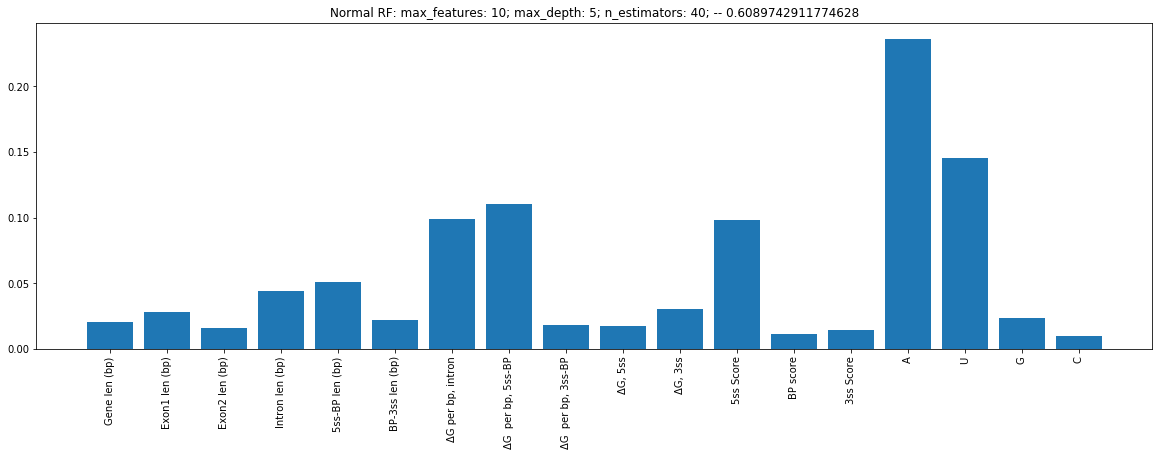

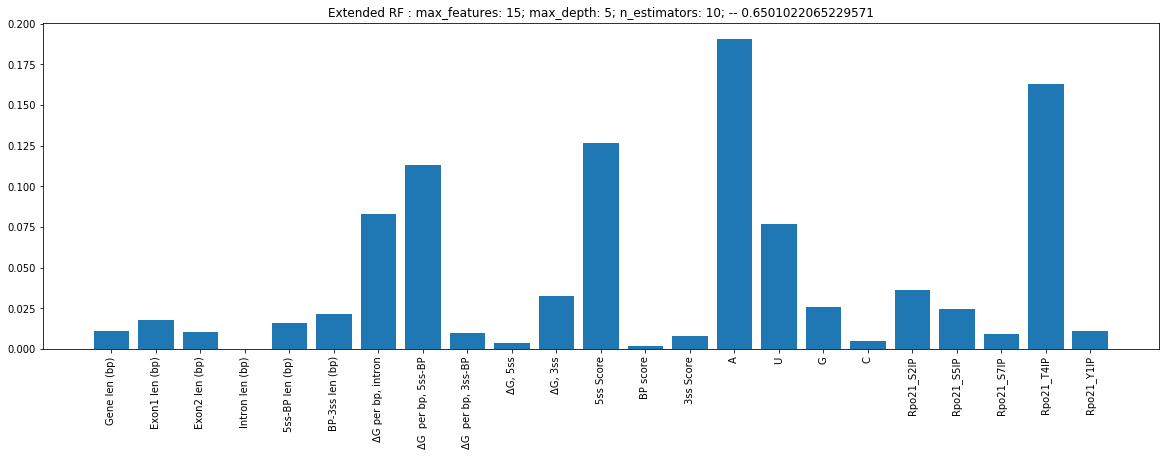

In [20]:
best_RFs(results_1_rp,results_2_rp,'rp_cut')

Normal best: 0.683828520812472 | max_features: 80; max_depth: 12; n_estimators: 10;
Extended best: 0.6995253307038448 | max_features: 25; max_depth: 5; n_estimators: 10;
Best difference: 0.178522036722764 | max_features: 7; max_depth: 5; n_estimators: 20;
Normal feature space
Coefficient of determination R^2: 0.3526340326994295
Mean squared error:               0.03376319974358975
Mean absolute error:              0.13876153846153846
Root mean squared error:          0.18374765234851234
Correlation Coefficient:          0.5972822538667238


Extended feature space
Coefficient of determination R^2: 0.32708078033033505
Mean squared error:               0.03509592282051282
Mean absolute error:              0.14166068376068375
Root mean squared error:          0.18733905844887985
Correlation Coefficient:          0.5756356719726347

# Non-RP Genes

In [21]:
X,y,X2,y2 = get_data('nrp_cut')

mxf = [5,7,10,12,15,18,20,25,30,50,80,10]
md = [5,7,10,12,15,18,20]
n_est = [10,20,30,40,50,60,80,90,100,120,140,160]

results_1_nrp = np.zeros((len(mxf),len(md),len(n_est)))
results_2_nrp = np.zeros((len(mxf),len(md),len(n_est)))

f = FloatProgress(min=0, max=(len(mxf)*len(md)*len(n_est)))
display(f)


i = 0
for max_features in mxf:
    j = 0
    for max_depth in md:
        k = 0
        for n_estimators in n_est:            
            
            kf = KFold(n_splits=5,shuffle=True,random_state=0)

            rfr1 = ExtraTreesRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            rfr2 = ExtraTreesRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
            predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
            
            print('max_features: {}; max_depth: {}; n_estimators: {};\n'.format(max_features,max_depth,n_estimators))

            print('Normal feature space')
            print_stats(y, predictions_rfr1)
            print('\n')
            print('Extended feature space')
            print_stats(y2, predictions_rfr2)
            print('-------------------------------------------------------\n')
            

            results_1_nrp[i][j][k]=np.corrcoef(y, predictions_rfr1)[0][1]
            results_2_nrp[i][j][k]=np.corrcoef(y2, predictions_rfr2)[0][1]
            
            f.value += 1
            
            k += 1
        j += 1
    i += 1

FloatProgress(value=0.0, max=1008.0)

max_features: 5; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.15972464701057176
Mean squared error:               0.049157302590879186
Mean absolute error:              0.18648199655983744
Root mean squared error:          0.22171446184423602
Correlation Coefficient:          0.40035276150609955


Extended feature space
Coefficient of determination R^2: 0.012279497519927074
Mean squared error:               0.057783053427534065
Mean absolute error:              0.19779515081719623
Root mean squared error:          0.24038105879526794
Correlation Coefficient:          0.21729828187148542
-------------------------------------------------------

max_features: 5; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.21161504302849654
Mean squared error:               0.04612164066227591
Mean absolute error:              0.17846136824244777
Root mean squared error:          0.2147594949292718
Correlation Coeffi

max_features: 5; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.11831044782399724
Mean squared error:               0.05158009211306454
Mean absolute error:              0.18645500131181944
Root mean squared error:          0.22711250981190917
Correlation Coefficient:          0.3543392554813894


Extended feature space
Coefficient of determination R^2: 0.07458708421563609
Mean squared error:               0.05413797103637301
Mean absolute error:              0.1860417426765154
Root mean squared error:          0.23267567779287332
Correlation Coefficient:          0.3051976944114157
-------------------------------------------------------

max_features: 5; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.134492494193859
Mean squared error:               0.050633419397849315
Mean absolute error:              0.18326342096245504
Root mean squared error:          0.2250187089951618
Correlation Coefficient: 

max_features: 5; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.0195530225829319
Mean squared error:               0.057357541872122574
Mean absolute error:              0.1946962481962482
Root mean squared error:          0.23949434622162288
Correlation Coefficient:          0.2676777420952829


Extended feature space
Coefficient of determination R^2: 0.08824580813257776
Mean squared error:               0.0533389162715252
Mean absolute error:              0.18318151875901872
Root mean squared error:          0.2309521947752937
Correlation Coefficient:          0.3257698877578079
-------------------------------------------------------

max_features: 5; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.13646014986307176
Mean squared error:               0.050518308744202226
Mean absolute error:              0.18071129148629148
Root mean squared error:          0.22476278327205823
Correlation Coefficien

max_features: 5; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.005409950521478968
Mean squared error:               0.05818493169191918
Mean absolute error:              0.19759646464646466
Root mean squared error:          0.24121552954136094
Correlation Coefficient:          0.25649078394915426


Extended feature space
Coefficient of determination R^2: 0.07814257018307424
Mean squared error:               0.053929970053198655
Mean absolute error:              0.1888050505050505
Root mean squared error:          0.23222827143394634
Correlation Coefficient:          0.32388260480947345
-------------------------------------------------------

max_features: 5; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.12344885941634365
Mean squared error:               0.0512794877307239
Mean absolute error:              0.18347065656565653
Root mean squared error:          0.2264497465901075
Correlation Coeffic

max_features: 5; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.006107751566960529
Mean squared error:               0.058858733636363625
Mean absolute error:              0.19853636363636365
Root mean squared error:          0.24260818954924754
Correlation Coefficient:          0.24405830609984755


Extended feature space
Coefficient of determination R^2: 0.056307540924813604
Mean squared error:               0.055207350303030304
Mean absolute error:              0.1912060606060606
Root mean squared error:          0.23496244445236414
Correlation Coefficient:          0.2975830894413462
-------------------------------------------------------

max_features: 5; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.1361624070635471
Mean squared error:               0.05053572712121212
Mean absolute error:              0.18189393939393939
Root mean squared error:          0.22480152828931596
Correlation Coef

max_features: 5; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.006107751566960529
Mean squared error:               0.058858733636363625
Mean absolute error:              0.19853636363636365
Root mean squared error:          0.24260818954924754
Correlation Coefficient:          0.24405830609984752


Extended feature space
Coefficient of determination R^2: 0.056307540924813604
Mean squared error:               0.055207350303030304
Mean absolute error:              0.1912060606060606
Root mean squared error:          0.23496244445236414
Correlation Coefficient:          0.2975830894413462
-------------------------------------------------------

max_features: 5; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.136162407063547
Mean squared error:               0.050535727121212126
Mean absolute error:              0.18189393939393939
Root mean squared error:          0.22480152828931596
Correlation Coef

max_features: 5; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.006107751566960529
Mean squared error:               0.058858733636363625
Mean absolute error:              0.19853636363636365
Root mean squared error:          0.24260818954924754
Correlation Coefficient:          0.24405830609984752


Extended feature space
Coefficient of determination R^2: 0.056307540924813715
Mean squared error:               0.0552073503030303
Mean absolute error:              0.1912060606060606
Root mean squared error:          0.23496244445236414
Correlation Coefficient:          0.2975830894413462
-------------------------------------------------------

max_features: 5; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.1361624070635472
Mean squared error:               0.05053572712121211
Mean absolute error:              0.18189393939393939
Root mean squared error:          0.22480152828931593
Correlation Coeffi

max_features: 7; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.1317746674052387
Mean squared error:               0.05079241612834069
Mean absolute error:              0.1855422962475235
Root mean squared error:          0.2253717287690288
Correlation Coefficient:          0.3721765787967114


Extended feature space
Coefficient of determination R^2: 0.09034498321771955
Mean squared error:               0.05321611154509304
Mean absolute error:              0.19823766066692008
Root mean squared error:          0.2306861754529149
Correlation Coefficient:          0.34626801195906004
-------------------------------------------------------

max_features: 7; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.1435712467375273
Mean squared error:               0.050102299468710525
Mean absolute error:              0.18668536735991278
Root mean squared error:          0.22383542943133583
Correlation Coefficient: 

max_features: 7; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.0088066071516536
Mean squared error:               0.05798622245074867
Mean absolute error:              0.19965787414605593
Root mean squared error:          0.24080328579724294
Correlation Coefficient:          0.23769386204287307


Extended feature space
Coefficient of determination R^2: 0.07669737438495017
Mean squared error:               0.05401451606171682
Mean absolute error:              0.19931227731864093
Root mean squared error:          0.23241023226552832
Correlation Coefficient:          0.35313600261899225
-------------------------------------------------------

max_features: 7; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.1067201055093061
Mean squared error:               0.052258143614001884
Mean absolute error:              0.1914538970625334
Root mean squared error:          0.22860040160507566
Correlation Coefficien

max_features: 7; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.07001014815859696
Mean squared error:               0.05440572830176767
Mean absolute error:              0.1908992424242424
Root mean squared error:          0.2332503554161658
Correlation Coefficient:          0.3177205895661191


Extended feature space
Coefficient of determination R^2: 0.06476782118602964
Mean squared error:               0.054712411881565656
Mean absolute error:              0.18950934343434342
Root mean squared error:          0.23390684445215718
Correlation Coefficient:          0.3336659258353503
-------------------------------------------------------

max_features: 7; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.12739522685664795
Mean squared error:               0.051048619625753695
Mean absolute error:              0.19166080447330444
Root mean squared error:          0.22593941583033647
Correlation Coeffici

max_features: 7; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.1108390513445544
Mean squared error:               0.05201717942760942
Mean absolute error:              0.1922373737373737
Root mean squared error:          0.22807275029606106
Correlation Coefficient:          0.3642120913046068


Extended feature space
Coefficient of determination R^2: 0.08112560920089718
Mean squared error:               0.05375545803030302
Mean absolute error:              0.18985757575757575
Root mean squared error:          0.23185223317946071
Correlation Coefficient:          0.34610651061137987
-------------------------------------------------------

max_features: 7; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.16093013727245276
Mean squared error:               0.04908677969696969
Mean absolute error:              0.18897171717171715
Root mean squared error:          0.22155536485711577
Correlation Coefficie

max_features: 7; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.12064218071789001
Mean squared error:               0.05144368242424241
Mean absolute error:              0.18978787878787876
Root mean squared error:          0.226811997972423
Correlation Coefficient:          0.37214189477519777


Extended feature space
Coefficient of determination R^2: 0.06702066056081335
Mean squared error:               0.05458061757575757
Mean absolute error:              0.1910848484848485
Root mean squared error:          0.233624950670423
Correlation Coefficient:          0.33458768079205603
-------------------------------------------------------

max_features: 7; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.165255941250939
Mean squared error:               0.048833714015151505
Mean absolute error:              0.1880439393939394
Root mean squared error:          0.2209835152565718
Correlation Coefficient:  

max_features: 7; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.12064218071789001
Mean squared error:               0.05144368242424241
Mean absolute error:              0.18978787878787876
Root mean squared error:          0.226811997972423
Correlation Coefficient:          0.37214189477519777


Extended feature space
Coefficient of determination R^2: 0.06702066056081335
Mean squared error:               0.05458061757575757
Mean absolute error:              0.1910848484848485
Root mean squared error:          0.233624950670423
Correlation Coefficient:          0.3345876807920561
-------------------------------------------------------

max_features: 7; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.165255941250939
Mean squared error:               0.048833714015151505
Mean absolute error:              0.1880439393939394
Root mean squared error:          0.2209835152565718
Correlation Coefficient:   

max_features: 7; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.12064218071789001
Mean squared error:               0.05144368242424241
Mean absolute error:              0.18978787878787876
Root mean squared error:          0.226811997972423
Correlation Coefficient:          0.37214189477519777


Extended feature space
Coefficient of determination R^2: 0.06702066056081335
Mean squared error:               0.05458061757575757
Mean absolute error:              0.1910848484848485
Root mean squared error:          0.233624950670423
Correlation Coefficient:          0.3345876807920561
-------------------------------------------------------

max_features: 7; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.165255941250939
Mean squared error:               0.048833714015151505
Mean absolute error:              0.1880439393939394
Root mean squared error:          0.2209835152565718
Correlation Coefficient:   

max_features: 10; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.03680381022502832
Mean squared error:               0.06065449670192744
Mean absolute error:              0.21247875816523545
Root mean squared error:          0.2462813364872122
Correlation Coefficient:          0.16056953334911422


Extended feature space
Coefficient of determination R^2: 0.025880591658654528
Mean squared error:               0.056987370086631794
Mean absolute error:              0.199867763276286
Root mean squared error:          0.23872027581802052
Correlation Coefficient:          0.24108118379436155
-------------------------------------------------------

max_features: 10; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.08338884991433915
Mean squared error:               0.05362305523139805
Mean absolute error:              0.19681068805587862
Root mean squared error:          0.23156652441878997
Correlation Coeffi

max_features: 10; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.04803208743834941
Mean squared error:               0.055691476095443004
Mean absolute error:              0.20268638845161568
Root mean squared error:          0.23599041526181314
Correlation Coefficient:          0.2920892710768411


Extended feature space
Coefficient of determination R^2: 0.0968823046877898
Mean squared error:               0.05283366894637251
Mean absolute error:              0.19038116522366522
Root mean squared error:          0.22985575682669449
Correlation Coefficient:          0.33812125826429007
-------------------------------------------------------

max_features: 10; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.10571484931507846
Mean squared error:               0.052316952530323424
Mean absolute error:              0.1925806160632297
Root mean squared error:          0.2287289936372812
Correlation Coeffici

max_features: 10; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.06351985365857293
Mean squared error:               0.05478541975589224
Mean absolute error:              0.19381868686868683
Root mean squared error:          0.2340628542846819
Correlation Coefficient:          0.33075743576538197


Extended feature space
Coefficient of determination R^2: 0.01813612708711465
Mean squared error:               0.057440432272727264
Mean absolute error:              0.20424242424242425
Root mean squared error:          0.23966733668301
Correlation Coefficient:          0.2436647213359834
-------------------------------------------------------

max_features: 10; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.11019149107307458
Mean squared error:               0.05205506262398989
Mean absolute error:              0.18857479797979795
Root mean squared error:          0.22815578586568847
Correlation Coeffici

max_features: 10; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.05403958127079955
Mean squared error:               0.055340029166666665
Mean absolute error:              0.1938348484848485
Root mean squared error:          0.2352446155954832
Correlation Coefficient:          0.3173965334173216


Extended feature space
Coefficient of determination R^2: -0.012665473599190902
Mean squared error:               0.05924236969696968
Mean absolute error:              0.20707878787878786
Root mean squared error:          0.24339755482947992
Correlation Coefficient:          0.21729139179621154
-------------------------------------------------------

max_features: 10; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.10563728642172998
Mean squared error:               0.052321490069839
Mean absolute error:              0.1901861742424242
Root mean squared error:          0.228738912452252
Correlation Coefficie

max_features: 10; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02756477909980848
Mean squared error:               0.05688884272727272
Mean absolute error:              0.1956939393939394
Root mean squared error:          0.23851382083072822
Correlation Coefficient:          0.2964388288864863


Extended feature space
Coefficient of determination R^2: -0.023665879701729287
Mean squared error:               0.05988590909090907
Mean absolute error:              0.2079151515151515
Root mean squared error:          0.24471597637038142
Correlation Coefficient:          0.2065056688191623
-------------------------------------------------------

max_features: 10; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.09289320075385132
Mean squared error:               0.053067037196969695
Mean absolute error:              0.1913409090909091
Root mean squared error:          0.2303628381422874
Correlation Coeffic

max_features: 10; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02756477909980848
Mean squared error:               0.05688884272727272
Mean absolute error:              0.1956939393939394
Root mean squared error:          0.23851382083072822
Correlation Coefficient:          0.2964388288864863


Extended feature space
Coefficient of determination R^2: -0.023665879701729287
Mean squared error:               0.05988590909090907
Mean absolute error:              0.2079151515151515
Root mean squared error:          0.24471597637038142
Correlation Coefficient:          0.2065056688191623
-------------------------------------------------------

max_features: 10; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.09289320075385132
Mean squared error:               0.053067037196969695
Mean absolute error:              0.19134090909090906
Root mean squared error:          0.2303628381422874
Correlation Coeffi

max_features: 10; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02756477909980848
Mean squared error:               0.05688884272727272
Mean absolute error:              0.1956939393939394
Root mean squared error:          0.23851382083072822
Correlation Coefficient:          0.29643882888648626


Extended feature space
Coefficient of determination R^2: -0.023665879701729287
Mean squared error:               0.05988590909090908
Mean absolute error:              0.2079151515151515
Root mean squared error:          0.24471597637038142
Correlation Coefficient:          0.2065056688191622
-------------------------------------------------------

max_features: 10; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.09289320075385132
Mean squared error:               0.053067037196969695
Mean absolute error:              0.19134090909090906
Root mean squared error:          0.2303628381422874
Correlation Coeff

max_features: 12; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.08368728843568296
Mean squared error:               0.05360559615367278
Mean absolute error:              0.18768870379620378
Root mean squared error:          0.23152882359151913
Correlation Coefficient:          0.29857969559659175


Extended feature space
Coefficient of determination R^2: 0.017729912726403008
Mean squared error:               0.05746419639025758
Mean absolute error:              0.19479010752072248
Root mean squared error:          0.239716908853459
Correlation Coefficient:          0.2453345460938407
-------------------------------------------------------

max_features: 12; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.06363969579823558
Mean squared error:               0.054778408820367865
Mean absolute error:              0.19165402174447033
Root mean squared error:          0.23404787719688436
Correlation Coeffic

max_features: 12; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.07320307318288977
Mean squared error:               0.0542189376491432
Mean absolute error:              0.18865602175602172
Root mean squared error:          0.23284960306846822
Correlation Coefficient:          0.29796045746700905


Extended feature space
Coefficient of determination R^2: 0.07991345811293504
Mean squared error:               0.05382637059200655
Mean absolute error:              0.18386407708453162
Root mean squared error:          0.2320051089782433
Correlation Coefficient:          0.30936170440519434
-------------------------------------------------------

max_features: 12; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.13864092311944531
Mean squared error:               0.05039073040876222
Mean absolute error:              0.17918134154565968
Root mean squared error:          0.22447879723653685
Correlation Coeffici

max_features: 12; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.10074340533449289
Mean squared error:               0.05260778907003367
Mean absolute error:              0.17581959595959595
Root mean squared error:          0.2293638791746287
Correlation Coefficient:          0.344043921559808


Extended feature space
Coefficient of determination R^2: 0.0016567854328755072
Mean squared error:               0.058404497184680125
Mean absolute error:              0.19297777777777775
Root mean squared error:          0.24167022403407526
Correlation Coefficient:          0.23052316587554023
-------------------------------------------------------

max_features: 12; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.1329227502868262
Mean squared error:               0.05072525164778224
Mean absolute error:              0.17882469696969697
Root mean squared error:          0.22522267125620865
Correlation Coeff

max_features: 12; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.08906465223985516
Mean squared error:               0.05329101272727272
Mean absolute error:              0.1779090909090909
Root mean squared error:          0.23084846269202816
Correlation Coefficient:          0.3304498448040121


Extended feature space
Coefficient of determination R^2: -0.005918437337775639
Mean squared error:               0.05884765848484848
Mean absolute error:              0.1952939393939394
Root mean squared error:          0.24258536329475544
Correlation Coefficient:          0.21948090246859298
-------------------------------------------------------

max_features: 12; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.1283630472401226
Mean squared error:               0.050992000757575755
Mean absolute error:              0.18017272727272726
Root mean squared error:          0.22581408449779158
Correlation Coeff

max_features: 12; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.10253780841001447
Mean squared error:               0.052502813939393926
Mean absolute error:              0.17695151515151514
Root mean squared error:          0.22913492518469097
Correlation Coefficient:          0.34348839958737787


Extended feature space
Coefficient of determination R^2: -0.016550253588055286
Mean squared error:               0.05946963484848484
Mean absolute error:              0.19609393939393938
Root mean squared error:          0.24386396791753562
Correlation Coefficient:          0.20527731160063362
-------------------------------------------------------

max_features: 12; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.14207587772113184
Mean squared error:               0.05018978068181818
Mean absolute error:              0.178780303030303
Root mean squared error:          0.22403075833871156
Correlation Coe

max_features: 12; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.10253780841001436
Mean squared error:               0.05250281393939393
Mean absolute error:              0.17695151515151517
Root mean squared error:          0.22913492518469097
Correlation Coefficient:          0.3434883995873777


Extended feature space
Coefficient of determination R^2: -0.016550253588055286
Mean squared error:               0.059469634848484845
Mean absolute error:              0.19609393939393938
Root mean squared error:          0.24386396791753562
Correlation Coefficient:          0.20527731160063342
-------------------------------------------------------

max_features: 12; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.14207587772113184
Mean squared error:               0.05018978068181818
Mean absolute error:              0.178780303030303
Root mean squared error:          0.22403075833871156
Correlation Coef

max_features: 12; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.10253780841001436
Mean squared error:               0.05250281393939393
Mean absolute error:              0.17695151515151517
Root mean squared error:          0.22913492518469097
Correlation Coefficient:          0.34348839958737776


Extended feature space
Coefficient of determination R^2: -0.016550253588055286
Mean squared error:               0.05946963484848484
Mean absolute error:              0.19609393939393938
Root mean squared error:          0.24386396791753562
Correlation Coefficient:          0.20527731160063348
-------------------------------------------------------

max_features: 12; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.14207587772113184
Mean squared error:               0.05018978068181818
Mean absolute error:              0.178780303030303
Root mean squared error:          0.22403075833871156
Correlation Coef

max_features: 15; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.06532257453370016
Mean squared error:               0.05467995802215192
Mean absolute error:              0.19218400217627485
Root mean squared error:          0.23383746069043754
Correlation Coefficient:          0.32610797892933907


Extended feature space
Coefficient of determination R^2: -0.027316616197899712
Mean squared error:               0.06009948236541172
Mean absolute error:              0.20566741004366001
Root mean squared error:          0.24515195770258846
Correlation Coefficient:          0.2014055099474954
-------------------------------------------------------

max_features: 15; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.0862092207766767
Mean squared error:               0.05345805952682909
Mean absolute error:              0.1912529613547227
Root mean squared error:          0.23120999011035204
Correlation Coeffic

max_features: 15; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.08857056202033076
Mean squared error:               0.053319917707458024
Mean absolute error:              0.19050414862914863
Root mean squared error:          0.23091106016702193
Correlation Coefficient:          0.34819908969377766


Extended feature space
Coefficient of determination R^2: -0.07934861659752035
Mean squared error:               0.06314342835163307
Mean absolute error:              0.19661916305916308
Root mean squared error:          0.25128356164228705
Correlation Coefficient:          0.133319244915854
-------------------------------------------------------

max_features: 15; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.09300877063500912
Mean squared error:               0.05306027619464081
Mean absolute error:              0.19020416404302767
Root mean squared error:          0.23034816299384897
Correlation Coeffi

max_features: 15; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.082874016599912
Mean squared error:               0.053653173712121215
Mean absolute error:              0.19011767676767674
Root mean squared error:          0.23163154731625227
Correlation Coefficient:          0.337218722831604


Extended feature space
Coefficient of determination R^2: -0.12956438152353478
Mean squared error:               0.06608112198089225
Mean absolute error:              0.21110005050505046
Root mean squared error:          0.25706248652981684
Correlation Coefficient:          0.06526892854604346
-------------------------------------------------------

max_features: 15; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.08328467153776498
Mean squared error:               0.053629149814515914
Mean absolute error:              0.1889123665223665
Root mean squared error:          0.23157968350983624
Correlation Coeffi

max_features: 15; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.10450739536078713
Mean squared error:               0.0523875903030303
Mean absolute error:              0.18616969696969699
Root mean squared error:          0.22888335523368733
Correlation Coefficient:          0.36239934577259675


Extended feature space
Coefficient of determination R^2: -0.09373774864362505
Mean squared error:               0.06398521303030302
Mean absolute error:              0.2076030303030303
Root mean squared error:          0.25295298581021536
Correlation Coefficient:          0.10960863289304816
-------------------------------------------------------

max_features: 15; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.11042826482848733
Mean squared error:               0.05204121102272728
Mean absolute error:              0.18520757575757577
Root mean squared error:          0.2281254282685893
Correlation Coeffi

max_features: 15; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.11432922352290553
Mean squared error:               0.05181299939393939
Mean absolute error:              0.1849878787878788
Root mean squared error:          0.22762468977230785
Correlation Coefficient:          0.3706182349578913


Extended feature space
Coefficient of determination R^2: -0.07984723923734083
Mean squared error:               0.06317259848484846
Mean absolute error:              0.2064212121212121
Root mean squared error:          0.2513415972035836
Correlation Coefficient:          0.12640246074747477
-------------------------------------------------------

max_features: 15; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.10935625319268893
Mean squared error:               0.05210392522727274
Mean absolute error:              0.18474696969696972
Root mean squared error:          0.22826284241477574
Correlation Coeffic

max_features: 15; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.11432922352290564
Mean squared error:               0.051812999393939387
Mean absolute error:              0.1849878787878788
Root mean squared error:          0.22762468977230785
Correlation Coefficient:          0.37061823495789137


Extended feature space
Coefficient of determination R^2: -0.07984723923734083
Mean squared error:               0.06317259848484846
Mean absolute error:              0.2064212121212121
Root mean squared error:          0.2513415972035836
Correlation Coefficient:          0.12640246074747477
-------------------------------------------------------

max_features: 15; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.11199981884549326
Mean squared error:               0.05194927287878789
Mean absolute error:              0.18394545454545455
Root mean squared error:          0.22792383130947033
Correlation Coeff

max_features: 15; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.11432922352290564
Mean squared error:               0.051812999393939387
Mean absolute error:              0.1849878787878788
Root mean squared error:          0.22762468977230785
Correlation Coefficient:          0.37061823495789137


Extended feature space
Coefficient of determination R^2: -0.07984723923734083
Mean squared error:               0.06317259848484846
Mean absolute error:              0.2064212121212121
Root mean squared error:          0.2513415972035836
Correlation Coefficient:          0.12640246074747477
-------------------------------------------------------

max_features: 15; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.11199981884549326
Mean squared error:               0.05194927287878789
Mean absolute error:              0.18394545454545455
Root mean squared error:          0.22792383130947033
Correlation Coeff

max_features: 18; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.15657073618404493
Mean squared error:               0.049341810857476145
Mean absolute error:              0.18456672079603897
Root mean squared error:          0.2221301664733454
Correlation Coefficient:          0.427552486041203


Extended feature space
Coefficient of determination R^2: 0.12630945884738853
Mean squared error:               0.05111213859770114
Mean absolute error:              0.182673606023606
Root mean squared error:          0.22607993851224645
Correlation Coefficient:          0.3565204940658726
-------------------------------------------------------

max_features: 18; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.161458207324646
Mean squared error:               0.04905588684827135
Mean absolute error:              0.17958018871700687
Root mean squared error:          0.22148563576058686
Correlation Coefficient: 

max_features: 18; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.15013021848187125
Mean squared error:               0.04971859029816938
Mean absolute error:              0.17686935185185185
Root mean squared error:          0.22297665863979885
Correlation Coefficient:          0.4141637606219859


Extended feature space
Coefficient of determination R^2: 0.11338426132201951
Mean squared error:               0.051868281025943284
Mean absolute error:              0.1838354632909178
Root mean squared error:          0.22774608893665613
Correlation Coefficient:          0.3636031875641514
-------------------------------------------------------

max_features: 18; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.1252836023852837
Mean squared error:               0.05117215265897652
Mean absolute error:              0.18565263429752066
Root mean squared error:          0.22621262709887907
Correlation Coefficie

max_features: 18; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.21131104831998615
Mean squared error:               0.04613942478484848
Mean absolute error:              0.1697221212121212
Root mean squared error:          0.21480089567980967
Correlation Coefficient:          0.47451673860875887


Extended feature space
Coefficient of determination R^2: 0.08943501651157171
Mean squared error:               0.053269345890909085
Mean absolute error:              0.18956121212121207
Root mean squared error:          0.23080152922134006
Correlation Coefficient:          0.3366636978422237
-------------------------------------------------------

max_features: 18; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.16722682951369183
Mean squared error:               0.048718414250187234
Mean absolute error:              0.1790590404040404
Root mean squared error:          0.22072248243028447
Correlation Coeff

max_features: 18; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.21833749006875858
Mean squared error:               0.045728367954545455
Mean absolute error:              0.16819242424242423
Root mean squared error:          0.21384192281810752
Correlation Coefficient:          0.48105718728540303


Extended feature space
Coefficient of determination R^2: 0.09416127017421727
Mean squared error:               0.052992853333333326
Mean absolute error:              0.19018181818181815
Root mean squared error:          0.23020176657300725
Correlation Coefficient:          0.3380537889466864
-------------------------------------------------------

max_features: 18; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.1653748299129073
Mean squared error:               0.0488267588594276
Mean absolute error:              0.17877373737373736
Root mean squared error:          0.22096777787593286
Correlation Coeff

max_features: 18; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.21993771666022466
Mean squared error:               0.04563475242424243
Mean absolute error:              0.1681424242424243
Root mean squared error:          0.21362292111157555
Correlation Coefficient:          0.4827552257052628


Extended feature space
Coefficient of determination R^2: 0.09416127017421727
Mean squared error:               0.052992853333333326
Mean absolute error:              0.19018181818181815
Root mean squared error:          0.23020176657300725
Correlation Coefficient:          0.3380537889466864
-------------------------------------------------------

max_features: 18; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.17170556438175588
Mean squared error:               0.0484564018939394
Mean absolute error:              0.17721969696969697
Root mean squared error:          0.22012814879960127
Correlation Coeffic

max_features: 18; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.21993771666022466
Mean squared error:               0.04563475242424243
Mean absolute error:              0.1681424242424243
Root mean squared error:          0.21362292111157555
Correlation Coefficient:          0.4827552257052628


Extended feature space
Coefficient of determination R^2: 0.09416127017421716
Mean squared error:               0.05299285333333333
Mean absolute error:              0.19018181818181817
Root mean squared error:          0.23020176657300728
Correlation Coefficient:          0.3380537889466864
-------------------------------------------------------

max_features: 18; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.1717055643817561
Mean squared error:               0.048456401893939384
Mean absolute error:              0.17721969696969697
Root mean squared error:          0.22012814879960124
Correlation Coeffic

max_features: 18; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.21993771666022466
Mean squared error:               0.04563475242424243
Mean absolute error:              0.16814242424242426
Root mean squared error:          0.21362292111157555
Correlation Coefficient:          0.4827552257052628


Extended feature space
Coefficient of determination R^2: 0.09416127017421727
Mean squared error:               0.052992853333333326
Mean absolute error:              0.19018181818181815
Root mean squared error:          0.23020176657300725
Correlation Coefficient:          0.3380537889466864
-------------------------------------------------------

max_features: 18; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.171705564381756
Mean squared error:               0.04845640189393939
Mean absolute error:              0.17721969696969697
Root mean squared error:          0.22012814879960124
Correlation Coeffic

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/runpy.py in _run_code(code=<code object <module> at 0x7f79ed628ae0, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5...ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/ghrist.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f79ed628ae0, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5...ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/ghrist.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "X,y,X2,y2 = get_data('nrp_cut')\n\nmxf = [5,7,10,1...    \n            k += 1\n        j += 1\n    i += 1", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 28, 16, 1, 2, 438848, tzinfo=tzutc()), 'msg_id': '7f39c4057a024e4d8b63d7bde59a5d95', 'msg_type': 'execute_request', 'session': '688c6bb77c35485b9048d72f0683fe03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7f39c4057a024e4d8b63d7bde59a5d95', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'688c6bb77c35485b9048d72f0683fe03']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "X,y,X2,y2 = get_data('nrp_cut')\n\nmxf = [5,7,10,1...    \n            k += 1\n        j += 1\n    i += 1", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 28, 16, 1, 2, 438848, tzinfo=tzutc()), 'msg_id': '7f39c4057a024e4d8b63d7bde59a5d95', 'msg_type': 'execute_request', 'session': '688c6bb77c35485b9048d72f0683fe03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7f39c4057a024e4d8b63d7bde59a5d95', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'688c6bb77c35485b9048d72f0683fe03'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "X,y,X2,y2 = get_data('nrp_cut')\n\nmxf = [5,7,10,1...    \n            k += 1\n        j += 1\n    i += 1", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 28, 16, 1, 2, 438848, tzinfo=tzutc()), 'msg_id': '7f39c4057a024e4d8b63d7bde59a5d95', 'msg_type': 'execute_request', 'session': '688c6bb77c35485b9048d72f0683fe03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7f39c4057a024e4d8b63d7bde59a5d95', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="X,y,X2,y2 = get_data('nrp_cut')\n\nmxf = [5,7,10,1...    \n            k += 1\n        j += 1\n    i += 1", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "X,y,X2,y2 = get_data('nrp_cut')\n\nmxf = [5,7,10,1...    \n            k += 1\n        j += 1\n    i += 1"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("X,y,X2,y2 = get_data('nrp_cut')\n\nmxf = [5,7,10,1...    \n            k += 1\n        j += 1\n    i += 1",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("X,y,X2,y2 = get_data('nrp_cut')\n\nmxf = [5,7,10,1...    \n            k += 1\n        j += 1\n    i += 1",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="X,y,X2,y2 = get_data('nrp_cut')\n\nmxf = [5,7,10,1...    \n            k += 1\n        j += 1\n    i += 1", store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.For object>], cell_name='<ipython-input-21-d3d30e8a57e5>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f799d2544a8, executi..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f79a7849d20, file "<ipython-input-21-d3d30e8a57e5>", line 15>
        result = <ExecutionResult object at 7f799d2544a8, executi..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f79a7849d20, file "<ipython-input-21-d3d30e8a57e5>", line 15>, result=<ExecutionResult object at 7f799d2544a8, executi..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f79a7849d20, file "<ipython-input-21-d3d30e8a57e5>", line 15>
        self.user_global_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'ExtraTreesRegressor': <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>, 'FloatProgress': <class 'ipywidgets.widgets.widget_float.FloatProgress'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', "from __future__ import print_function, division\n..._ipython().run_line_magic('matplotlib', 'inline')", "def fit_scatter(y_true, y_pred):\n    assert y_tr....set_ylabel('Predicted AUC')\n    ax.set_title('')", "def print_stats(true,predictions):\n    print('Co...{}'.format(np.corrcoef(true, predictions)[0][1]))", 'def get_best_settings(results_1,results_2):\n    ...t_k_1],mxf[best_i_2],md[best_j_2],n_est[best_k_2]', "data_path = os.path.join(os.getcwd(), 'datasets'...res_cut.shape[0],extended_features_cut.shape[1]))", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', 'kf = KFold(n_splits=5,shuffle=True,random_state=0)', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", "X,y,X2,y2 = get_data('cut')\n\nrfr1 = ExtraTreesRe...forrest regression extended features importance')", 'def best_RFs(results1,results2,dataset):\n     \n ...ettings,np.corrcoef(y2, predictions_rfr2)[0][1]))', "X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1", 'get_best_settings(results_1_full,results_2_full)', "best_RFs(results_1_full,results_2_full,'cut')", "X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1", 'get_best_settings(results_1_rp,results_2_rp)', "best_RFs(results_1_rp,results_2_rp,'rp_cut')", 'def best_RFs(results1,results2,dataset):\n     \n ...ettings,np.corrcoef(y2, predictions_rfr2)[0][1]))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, ...}
        self.user_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'ExtraTreesRegressor': <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>, 'FloatProgress': <class 'ipywidgets.widgets.widget_float.FloatProgress'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', "from __future__ import print_function, division\n..._ipython().run_line_magic('matplotlib', 'inline')", "def fit_scatter(y_true, y_pred):\n    assert y_tr....set_ylabel('Predicted AUC')\n    ax.set_title('')", "def print_stats(true,predictions):\n    print('Co...{}'.format(np.corrcoef(true, predictions)[0][1]))", 'def get_best_settings(results_1,results_2):\n    ...t_k_1],mxf[best_i_2],md[best_j_2],n_est[best_k_2]', "data_path = os.path.join(os.getcwd(), 'datasets'...res_cut.shape[0],extended_features_cut.shape[1]))", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', 'kf = KFold(n_splits=5,shuffle=True,random_state=0)', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", 'def get_data(dataset):\n    \n    X = gene_feature...d\n    else:\n        return None, None, None, None', "X,y,X2,y2 = get_data('cut')\n\nlr1 = LinearRegress...int('Extended Data')\nprint_stats(y2,predictions2)", "X,y,X2,y2 = get_data('cut')\n\nrfr1 = ExtraTreesRe...forrest regression extended features importance')", 'def best_RFs(results1,results2,dataset):\n     \n ...ettings,np.corrcoef(y2, predictions_rfr2)[0][1]))', "X,y,X2,y2 = get_data('cut')\nprint('echo')\nmxf = ...    \n            k += 1\n        j += 1\n    i += 1", 'get_best_settings(results_1_full,results_2_full)', "best_RFs(results_1_full,results_2_full,'cut')", "X,y,X2,y2 = get_data('rp_cut')\n\nmxf = [5,7,10,12...    \n            k += 1\n        j += 1\n    i += 1", 'get_best_settings(results_1_rp,results_2_rp)', "best_RFs(results_1_rp,results_2_rp,'rp_cut')", 'def best_RFs(results1,results2,dataset):\n     \n ...ettings,np.corrcoef(y2, predictions_rfr2)[0][1]))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/home/ghristov/Random-forest-regression-on-mRNA-data/<ipython-input-21-d3d30e8a57e5> in <module>()
     32                                         max_features=max_features, 
     33                                         max_depth=max_depth, 
     34                                         n_jobs=2,
     35                                         random_state=1337)
     36 
---> 37             predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
     38             predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
     39             
     40             print('max_features: {}; max_depth: {}; n_estimators: {};\n'.format(max_features,max_depth,n_estimators))
     41 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/model_selection/_validation.py in cross_val_predict(estimator=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=    Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...  0.160  0.218  
32  0.301  0.308  0.158  0.233  , y=0     0.481
1     0.235
2     0.740
3     0.856
...31    0.666
32    0.201
Name: AUC, dtype: float64, groups=None, cv=KFold(n_splits=5, random_state=0, shuffle=True), n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', method='predict')
    675     # independent, and that it is pickle-able.
    676     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
    677                         pre_dispatch=pre_dispatch)
    678     prediction_blocks = parallel(delayed(_fit_and_predict)(
    679         clone(estimator), X, y, train, test, verbose, fit_params, method)
--> 680         for train, test in cv.split(X, y, groups))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=0, shuffle=True)>
        X =     Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...  0.160  0.218  
32  0.301  0.308  0.158  0.233  
        y = 0     0.481
1     0.235
2     0.740
3     0.856
...31    0.666
32    0.201
Name: AUC, dtype: float64
        groups = None
    681 
    682     # Concatenate the predictions
    683     predictions = [pred_block_i for pred_block_i, _ in prediction_blocks]
    684     test_indices = np.concatenate([indices_i

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object cross_val_predict.<locals>.<genexpr>>)
    774         self.n_completed_tasks = 0
    775         try:
    776             # Only set self._iterating to True if at least a batch
    777             # was dispatched. In particular this covers the edge
    778             # case of Parallel used with an exhausted iterator.
--> 779             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object cross_val_predict.<locals>.<genexpr>>
    780                 self._iterating = True
    781             else:
    782                 self._iterating = False
    783 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object cross_val_predict.<locals>.<genexpr>>)
    620             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    621             if len(tasks) == 0:
    622                 # No more tasks available in the iterator: tell caller to stop.
    623                 return False
    624             else:
--> 625                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    626                 return True
    627 
    628     def _print(self, msg, msg_args):
    629         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    583         self.n_dispatched_tasks += len(batch)
    584         self.n_dispatched_batches += 1
    585 
    586         dispatch_timestamp = time.time()
    587         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 588         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    589         self._jobs.append(job)
    590 
    591     def dispatch_next(self):
    592         """Dispatch more data for parallel processing

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    106             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    107         return 1
    108 
    109     def apply_async(self, func, callback=None):
    110         """Schedule a func to be run"""
--> 111         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    112         if callback:
    113             callback(result)
    114         return result
    115 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    327 
    328 class ImmediateResult(object):
    329     def __init__(self, batch):
    330         # Don't delay the application, to avoid keeping the input
    331         # arguments in memory
--> 332         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    333 
    334     def get(self):
    335         return self.results
    336 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_predict>, (ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False),     Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...  0.160  0.218  
32  0.301  0.308  0.158  0.233  , 0     0.481
1     0.235
2     0.740
3     0.856
...31    0.666
32    0.201
Name: AUC, dtype: float64, array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 1..., 19,
       21, 22, 23, 27, 28, 29, 30, 31, 32]), array([ 2, 11, 17, 20, 24, 25, 26]), 0, None, 'predict'), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_predict>
        args = (ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False),     Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...  0.160  0.218  
32  0.301  0.308  0.158  0.233  , 0     0.481
1     0.235
2     0.740
3     0.856
...31    0.666
32    0.201
Name: AUC, dtype: float64, array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 1..., 19,
       21, 22, 23, 27, 28, 29, 30, 31, 32]), array([ 2, 11, 17, 20, 24, 25, 26]), 0, None, 'predict')
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/model_selection/_validation.py in _fit_and_predict(estimator=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=    Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...  0.160  0.218  
32  0.301  0.308  0.158  0.233  , y=0     0.481
1     0.235
2     0.740
3     0.856
...31    0.666
32    0.201
Name: AUC, dtype: float64, train=array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 1..., 19,
       21, 22, 23, 27, 28, 29, 30, 31, 32]), test=array([ 2, 11, 17, 20, 24, 25, 26]), verbose=0, fit_params={}, method='predict')
    748     X_test, _ = _safe_split(estimator, X, y, test, train)
    749 
    750     if y_train is None:
    751         estimator.fit(X_train, **fit_params)
    752     else:
--> 753         estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of ExtraTreesRegres... random_state=1337, verbose=0, warm_start=False)>
        X_train =     Gene len (bp)  Exon1 len (bp)  Exon2 len (bp...  0.160  0.218  
32  0.301  0.308  0.158  0.233  
        y_train = 0     0.481
1     0.235
3     0.856
4     0.499
...31    0.666
32    0.201
Name: AUC, dtype: float64
        fit_params = {}
    754     func = getattr(estimator, method)
    755     predictions = func(X_test)
    756     if method in ['decision_function', 'predict_proba', 'predict_log_proba']:
    757         n_classes = len(set(y))

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/ensemble/forest.py in fit(self=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=array([[ 1.4370e+03,  1.0000e+01,  1.1180e+03,  ...0e-01,  1.5800e-01,  2.3300e-01]], dtype=float32), y=array([[0.481],
       [0.235],
       [0.856],
...
       [0.06 ],
       [0.666],
       [0.201]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 9
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Mar 28 17:24:05 2018
PID: 17417      Python 3.5.4: /home/ghristov/miniconda3/envs/mlp/bin/python
...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), array([[ 1.4370e+03,  1.0000e+01,  1.1180e+03,  ...0e-01,  1.5800e-01,  2.3300e-01]], dtype=float32), array([[0.481],
       [0.235],
       [0.856],
...
       [0.06 ],
       [0.666],
       [0.201]]), None, 0, 10), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), array([[ 1.4370e+03,  1.0000e+01,  1.1180e+03,  ...0e-01,  1.5800e-01,  2.3300e-01]], dtype=float32), array([[0.481],
       [0.235],
       [0.856],
...
       [0.06 ],
       [0.666],
       [0.201]]), None, 0, 10)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), forest=ExtraTreesRegressor(bootstrap=False, criterion='..., random_state=1337, verbose=0, warm_start=False), X=array([[ 1.4370e+03,  1.0000e+01,  1.1180e+03,  ...0e-01,  1.5800e-01,  2.3300e-01]], dtype=float32), y=array([[0.481],
       [0.235],
       [0.856],
...
       [0.06 ],
       [0.666],
       [0.201]]), sample_weight=None, tree_idx=0, n_trees=10, verbose=0, class_weight=None)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
    121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
    122     else:
--> 123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeRegressor.fit of Extra...m_state=1125387415,
          splitter='random')>
        X = array([[ 1.4370e+03,  1.0000e+01,  1.1180e+03,  ...0e-01,  1.5800e-01,  2.3300e-01]], dtype=float32)
        y = array([[0.481],
       [0.235],
       [0.856],
...
       [0.06 ],
       [0.666],
       [0.201]])
        sample_weight = None
    124 
    125     return tree
    126 
    127 

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/tree/tree.py in fit(self=ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), X=array([[ 1.4370e+03,  1.0000e+01,  1.1180e+03,  ...0e-01,  1.5800e-01,  2.3300e-01]], dtype=float32), y=array([[0.481],
       [0.235],
       [0.856],
...
       [0.06 ],
       [0.666],
       [0.201]]), sample_weight=None, check_input=False, X_idx_sorted=None)
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/tree/tree.py in fit(self=ExtraTreeRegressor(criterion='mse', max_depth=5,...om_state=1125387415,
          splitter='random'), X=array([[ 1.4370e+03,  1.0000e+01,  1.1180e+03,  ...0e-01,  1.5800e-01,  2.3300e-01]], dtype=float32), y=array([[0.481],
       [0.235],
       [0.856],
...
       [0.06 ],
       [0.666],
       [0.201]]), sample_weight=None, check_input=False, X_idx_sorted=None)
    237         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    238             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    239         if max_depth <= 0:
    240             raise ValueError("max_depth must be greater than zero. ")
    241         if not (0 < max_features <= self.n_features_):
--> 242             raise ValueError("max_features must be in (0, n_features]")
    243         if not isinstance(max_leaf_nodes, (numbers.Integral, np.integer)):
    244             raise ValueError("max_leaf_nodes must be integral number but was "
    245                              "%r" % max_leaf_nodes)
    246         if -1 < max_leaf_nodes < 2:

ValueError: max_features must be in (0, n_features]
___________________________________________________________________________

In [22]:
get_best_settings(results_1_nrp,results_2_nrp)

Normal best: 0.4827552257052628 | max_features: 18; max_depth: 15; n_estimators: 10;
Extended best: 0.4325119102278271 | max_features: 18; max_depth: 7; n_estimators: 20;
Best difference: 0.11544214057611918 | max_features: 7; max_depth: 7; n_estimators: 10;


(18, 15, 10, 18, 7, 20)

Normal best: 0.4827552257052628 | max_features: 18; max_depth: 15; n_estimators: 10;
Extended best: 0.4325119102278271 | max_features: 18; max_depth: 7; n_estimators: 20;
Best difference: 0.11544214057611918 | max_features: 7; max_depth: 7; n_estimators: 10;
Normal feature space
Coefficient of determination R^2: 0.21993771666022466
Mean squared error:               0.04563475242424243
Mean absolute error:              0.1681424242424243
Root mean squared error:          0.21362292111157555
Correlation Coefficient:          0.4827552257052628


Extended feature space
Coefficient of determination R^2: 0.1864707527367826
Mean squared error:               0.04759261738663812
Mean absolute error:              0.18000232530937074
Root mean squared error:          0.2181573225602068
Correlation Coefficient:          0.4325119102278271
-------------------------------------------------------



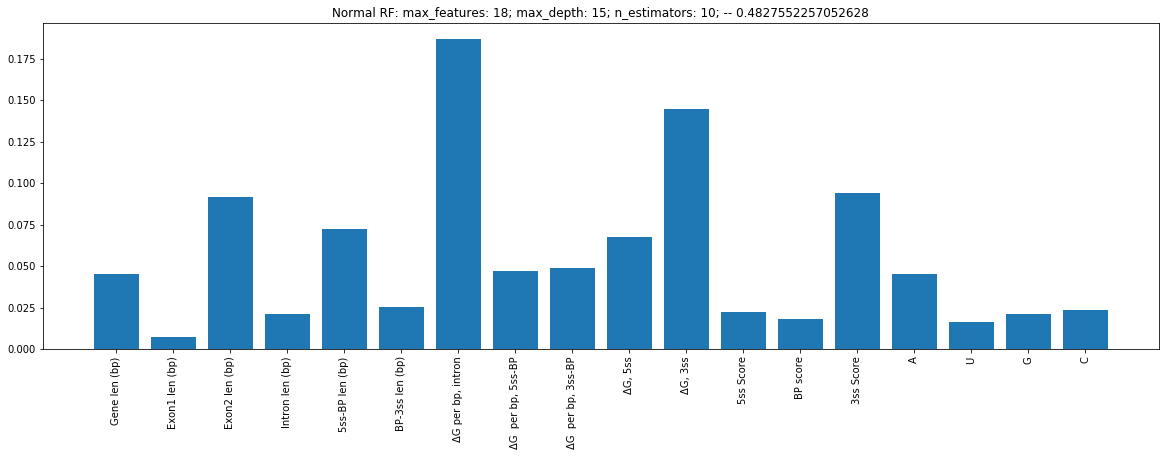

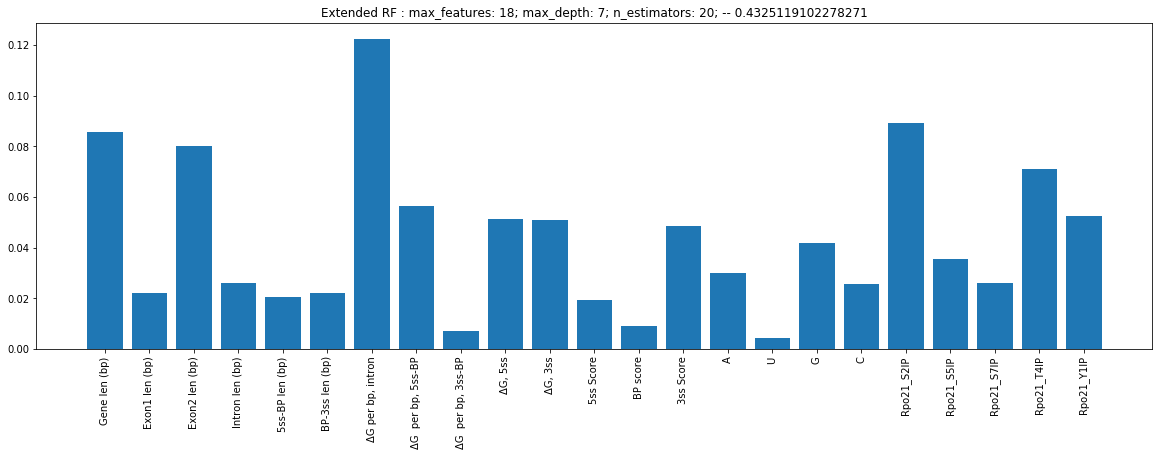

In [23]:
best_RFs(results_1_nrp,results_2_nrp,'nrp_cut')

Normal best: 0.2969901764177368 | max_features: 25; max_depth: 5; n_estimators: 10;
Extended best: 0.40630448232918154 | max_features: 30; max_depth: 7; n_estimators: 20;
Best difference: 0.2582434619528223 | max_features: 30; max_depth: 7; n_estimators: 20;
Normal feature space
Coefficient of determination R^2: 0.2360352774266372
Mean squared error:               0.03984437679487179
Mean absolute error:              0.1488410256410256
Root mean squared error:          0.19961056283391365
Correlation Coefficient:          0.48848065665874996


Extended feature space
Coefficient of determination R^2: 0.38909635792549957
Mean squared error:               0.031861516874999996
Mean absolute error:              0.13109380341880345
Root mean squared error:          0.1784979464167585
Correlation Coefficient:          0.6250700537546936